#**Mitigating Customer Churn: Leveraging Historical Data Analysis and Predictive Modelling to Formulate Effective Customer Retention Strategies**

In [ ]:
# Import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [ ]:
# Load the dataset

churn_df = pd.read_csv('Bank_CustomerChurn.csv')

In [ ]:
# Display the first 10 rows of the dataset

churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [ ]:
# Summarize information about variables in the dataset, constituting data types and non-null values

churn_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [ ]:
# Identify the number of rows and columns in the dataset

n_rows = len(churn_df.axes[0])
n_columns = len(churn_df.axes[1])

print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 10000
Number of columns: 14


##**Data Pre-processing**

###Identification of Missing Values

In [ ]:
# Identify any missing values in the dataset

churn_df.isna().sum()

,0
RowNumber,0
CustomerId,0
Surname,0
CreditScore,0
Geography,0
Gender,0
Age,0
Tenure,0
Balance,0
NumOfProducts,0


###Detection of outliers

In [ ]:
# Access numerical variables from the dataset

numerical_variables = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary', 'Exited']

In [ ]:
# Generate descriptive statistics to identify the distribution, central tendency and spread of numerical variables

churn_df[numerical_variables].describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


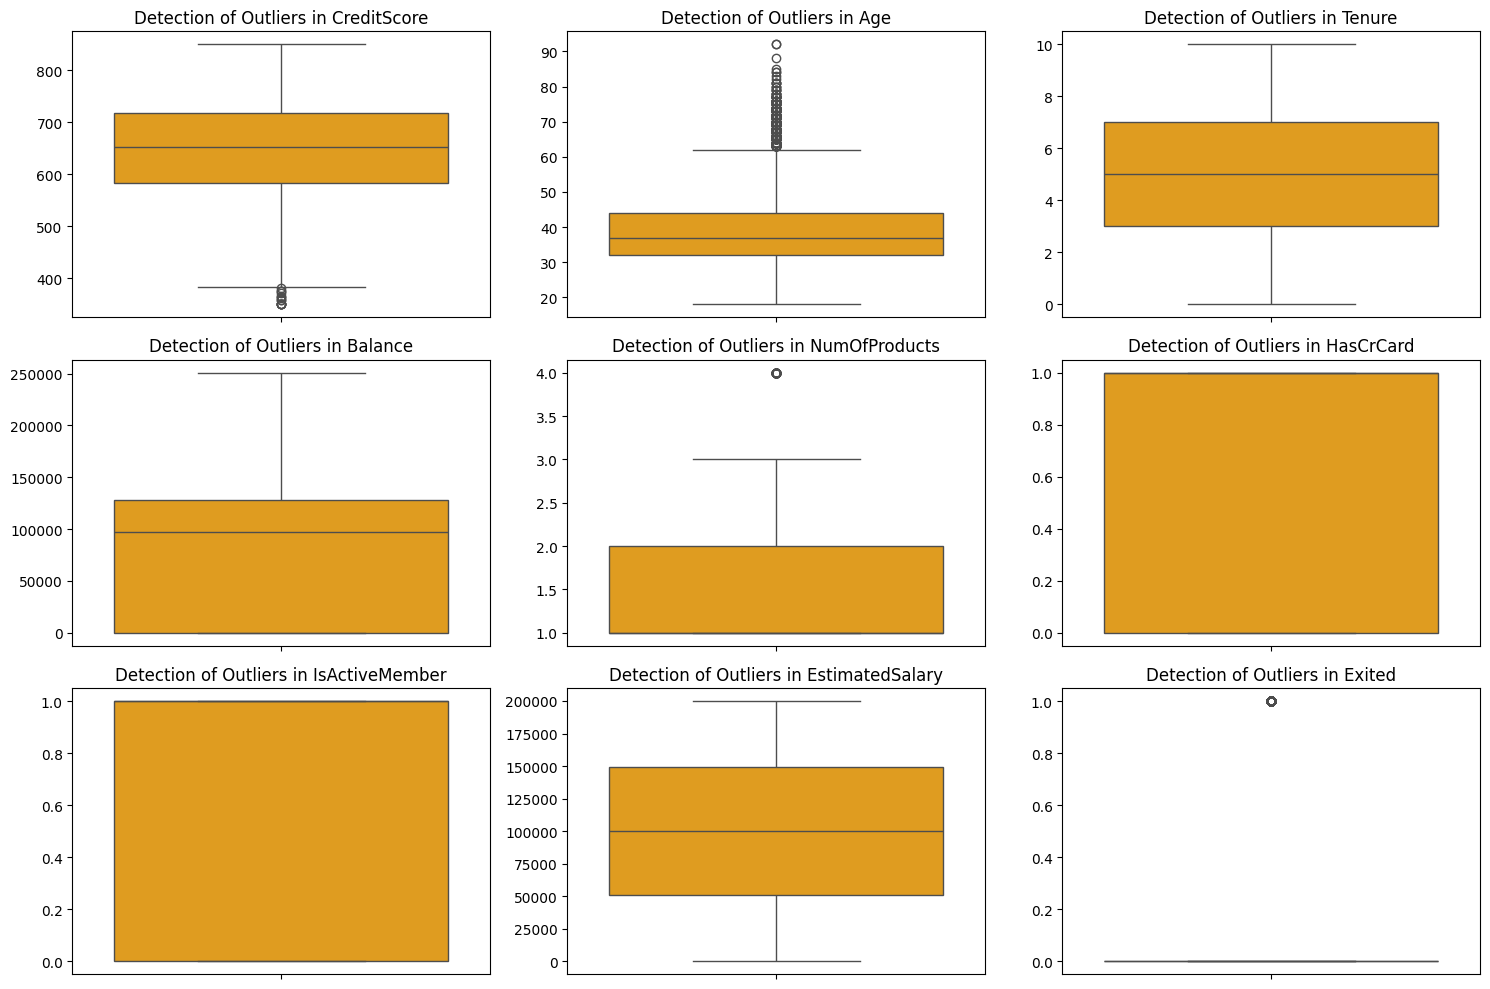

In [ ]:
# Create a figure and axis for each numerical variable

plt.figure(figsize = (15, 10))

# Create a boxplot for each numerical variable through a loop

for i, feature in enumerate(numerical_variables):
    plt.subplot(3, 3, i+1)
    sns.boxplot(y = churn_df[feature], color = 'orange')
    plt.title(f'Detection of Outliers in {feature}')
    plt.ylabel('')

# Adjust layout to avoid overlap and plot the data

plt.tight_layout()
plt.show()

###Correlation Analysis between Numerical Variables

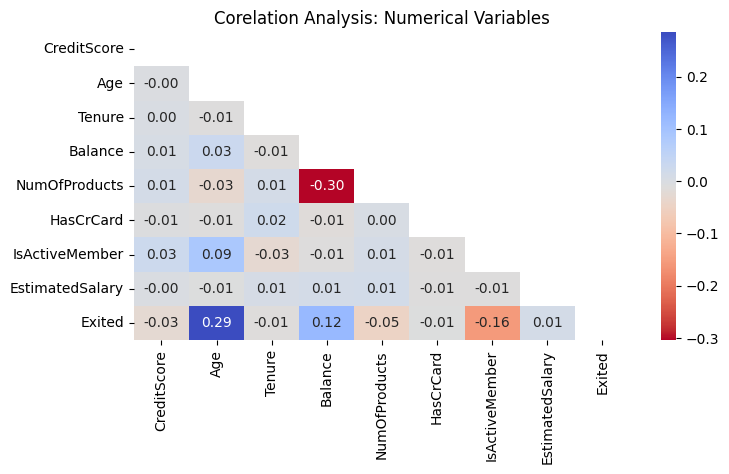

In [ ]:
# Create a correlation matrix

correlation_matrix = churn_df[numerical_variables].corr()

# Create a mask to display only the lower triangle of the matrix

mask = np.triu(np.ones_like(correlation_matrix, dtype = bool))

# Create a figure and axis

plt.figure(figsize = (8, 4))

# Create a heatmap of the correlation matrix with the mask

sns.heatmap(correlation_matrix, annot = True, cmap = 'coolwarm_r', fmt = ".2f", mask = mask)

plt.title('Corelation Analysis: Numerical Variables')
plt.show()

###Categorization of Relevant Variables

In [ ]:
# Classify customers' credit scores, from poor to exceptional, using a loop

def grouped_creditscore(CreditScore):
  if CreditScore < 580:
    return 'Poor'
  elif CreditScore >= 580 and CreditScore <= 669:
    return 'Fair'
  elif CreditScore >= 670 and CreditScore <= 739:
    return 'Good'
  elif CreditScore >= 740 and CreditScore <= 799:
      return 'Very Good'
  else:
      return 'Exceptional'

In [ ]:
# Create a new variable CategorizedCreditScore in the dataset to classify customers' credit scores

churn_df['CategorizedCreditScore'] = churn_df['CreditScore'].apply(grouped_creditscore)

In [ ]:
# Display the newly added variable of CategorizedCreditScore within the dataset

churn_df['CategorizedCreditScore'].head(10)

,CategorizedCreditScore
0,Fair
1,Fair
2,Poor
3,Good
4,Exceptional
5,Fair
6,Exceptional
7,Poor
8,Poor
9,Good


In [ ]:
# Classify customers' ages, from young adults to retired adults, using a loop

def grouped_age(Age):
  if Age >= 18 and Age <= 24:
    return 'Young Adults'
  elif Age >= 25 and Age <= 34:
    return 'Early Career Adults'
  elif Age >= 35 and Age <= 44:
    return 'Mid-Career Adults'
  elif Age >= 45 and Age <= 54:
    return 'Late Career Adults'
  elif Age >= 55 and Age <= 64:
    return 'Near-Retirement Adults'
  else:
    return 'Retired Adults'

In [ ]:
# Create a new variable CategorizedAge in the dataset to classify customers' ages

churn_df['CategorizedAge'] = churn_df['Age'].apply(grouped_age)

In [ ]:
# Display the newly added variable of CategorizedAge within the dataset

churn_df['CategorizedAge'].head(10)

,CategorizedAge
0,Mid-Career Adults
1,Mid-Career Adults
2,Mid-Career Adults
3,Mid-Career Adults
4,Mid-Career Adults
5,Mid-Career Adults
6,Late Career Adults
7,Early Career Adults
8,Mid-Career Adults
9,Early Career Adults


In [ ]:
# Display the first 10 rows of the dataset after adding the variables CategorizedCreditScore and CategorizedAge

churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CategorizedCreditScore,CategorizedAge
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1,Fair,Mid-Career Adults
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,Fair,Mid-Career Adults
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,Poor,Mid-Career Adults
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0,Good,Mid-Career Adults
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,Exceptional,Mid-Career Adults
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1,Fair,Mid-Career Adults
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0,Exceptional,Late Career Adults
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1,Poor,Early Career Adults
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0,Poor,Mid-Career Adults
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0,Good,Early Career Adults


In [ ]:
# Identify the number of rows and columns in the dataset after adding the variables CategorizedCreditScore and CategorizedAge

n_rows = len(churn_df.axes[0])
n_columns = len(churn_df.axes[1])

print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 10000
Number of columns: 16


###Conversion of Relevant Variables into Categorical Data Types

In [ ]:
# Summarize information about the data types of variables in the dataset

churn_df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,object
Gender,object
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,int64


In [ ]:
# Convert relevant variables, including Gender, CategorizedAge, Geography, CategorizedCreditScore, NumOfProducts, HasCrCard, IsActiveMember and Exited, to categories

churn_df['Gender'] = churn_df['Gender'].astype('category')
churn_df['CategorizedAge'] = churn_df['CategorizedAge'].astype('category')
churn_df['Geography'] = churn_df['Geography'].astype('category')
churn_df['CategorizedCreditScore'] = churn_df['CategorizedCreditScore'].astype('category')
churn_df['NumOfProducts'] = churn_df['NumOfProducts'].astype('category')
churn_df['HasCrCard'] = churn_df['HasCrCard'].astype('category')
churn_df['IsActiveMember'] = churn_df['IsActiveMember'].astype('category')
churn_df['Exited'] = churn_df['Exited'].astype('category')

In [ ]:
# Summarize information about the data types of variables in the dataset after converting the relevant variables to categories

churn_df.dtypes

,0
RowNumber,int64
CustomerId,int64
Surname,object
CreditScore,int64
Geography,category
Gender,category
Age,int64
Tenure,int64
Balance,float64
NumOfProducts,category


###Replacement of Binary Variables for Improved Data Interpretation

In [ ]:
# Replace categorical variables, including HasCrCard, IsActiveMember and Exited, with 0 and 1 to No and Yes, respectively

churn_df[['HasCrCard', 'IsActiveMember', 'Exited']] = churn_df[['HasCrCard', 'IsActiveMember', 'Exited']].replace({0: 'No', 1: 'Yes'})

In [ ]:
# Display the relevant variables after replacing categorical variables with 0 and 1 to No and Yes, respectively

churn_df[['HasCrCard', 'IsActiveMember', 'Exited']]

,HasCrCard,IsActiveMember,Exited
0,Yes,Yes,Yes
1,No,Yes,No
2,Yes,No,Yes
3,No,No,No
4,Yes,Yes,No
...,...,...,...
9995,Yes,No,No
9996,Yes,Yes,No
9997,No,Yes,Yes
9998,Yes,No,Yes


In [ ]:
# Display the first 10 rows of the dataset after replacing the categorical variables with 0 and 1 to No and Yes, respectively

churn_df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CategorizedCreditScore,CategorizedAge
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Fair,Mid-Career Adults
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Fair,Mid-Career Adults
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Poor,Mid-Career Adults
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,No,No,93826.63,No,Good,Mid-Career Adults
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,Exceptional,Mid-Career Adults
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes,Fair,Mid-Career Adults
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No,Exceptional,Late Career Adults
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes,Poor,Early Career Adults
8,9,15792365,He,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No,Poor,Mid-Career Adults
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,Yes,Yes,71725.73,No,Good,Early Career Adults


### Removal of Irrelavant Variables

In [ ]:
# Remove irrelvant variables, including RowNumber, CustomerID and Surname

churn_df = churn_df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1)

In [ ]:
# Display the first 10 rows of the dataset after removing the irrelvant variables

churn_df.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,CategorizedCreditScore,CategorizedAge
0,619,France,Female,42,2,0.00,1,Yes,Yes,101348.88,Yes,Fair,Mid-Career Adults
1,608,Spain,Female,41,1,83807.86,1,No,Yes,112542.58,No,Fair,Mid-Career Adults
2,502,France,Female,42,8,159660.80,3,Yes,No,113931.57,Yes,Poor,Mid-Career Adults
3,699,France,Female,39,1,0.00,2,No,No,93826.63,No,Good,Mid-Career Adults
4,850,Spain,Female,43,2,125510.82,1,Yes,Yes,79084.10,No,Exceptional,Mid-Career Adults
5,645,Spain,Male,44,8,113755.78,2,Yes,No,149756.71,Yes,Fair,Mid-Career Adults
6,822,France,Male,50,7,0.00,2,Yes,Yes,10062.80,No,Exceptional,Late Career Adults
7,376,Germany,Female,29,4,115046.74,4,Yes,No,119346.88,Yes,Poor,Early Career Adults
8,501,France,Male,44,4,142051.07,2,No,Yes,74940.50,No,Poor,Mid-Career Adults
9,684,France,Male,27,2,134603.88,1,Yes,Yes,71725.73,No,Good,Early Career Adults


In [ ]:
# Identify the number of rows and columns in the dataset after removing the irrelevant variables

n_rows = len(churn_df.axes[0])
n_columns = len(churn_df.axes[1])

print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 10000
Number of columns: 13


###Organization of All Variables

In [ ]:
# Organize the variables according to two components: demographics and financial information of customers

churn_df = churn_df[['Gender', 'Age', 'CategorizedAge', 'Geography', # Demographics
                     'Balance', 'EstimatedSalary', 'CreditScore', 'CategorizedCreditScore', 'NumOfProducts', 'HasCrCard', 'Tenure', 'IsActiveMember', 'Exited']] # Financial Information

In [ ]:
# Display the first 10 rows of the dataset after organizing the variables

churn_df.head(10)

,Gender,Age,CategorizedAge,Geography,Balance,EstimatedSalary,CreditScore,CategorizedCreditScore,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,Female,42,Mid-Career Adults,France,0.00,101348.88,619,Fair,1,Yes,2,Yes,Yes
1,Female,41,Mid-Career Adults,Spain,83807.86,112542.58,608,Fair,1,No,1,Yes,No
2,Female,42,Mid-Career Adults,France,159660.80,113931.57,502,Poor,3,Yes,8,No,Yes
3,Female,39,Mid-Career Adults,France,0.00,93826.63,699,Good,2,No,1,No,No
4,Female,43,Mid-Career Adults,Spain,125510.82,79084.10,850,Exceptional,1,Yes,2,Yes,No
5,Male,44,Mid-Career Adults,Spain,113755.78,149756.71,645,Fair,2,Yes,8,No,Yes
6,Male,50,Late Career Adults,France,0.00,10062.80,822,Exceptional,2,Yes,7,Yes,No
7,Female,29,Early Career Adults,Germany,115046.74,119346.88,376,Poor,4,Yes,4,No,Yes
8,Male,44,Mid-Career Adults,France,142051.07,74940.50,501,Poor,2,No,4,Yes,No
9,Male,27,Early Career Adults,France,134603.88,71725.73,684,Good,1,Yes,2,Yes,No


In [ ]:
# Identify the number of rows and columns in the dataset after organizing the variables

n_rows = len(churn_df.axes[0])
n_columns = len(churn_df.axes[1])

print('Number of rows:', n_rows)
print('Number of columns:', n_columns)

Number of rows: 10000
Number of columns: 13


###Exporting of Pre-processed data

In [ ]:
# Export the pre-processed dataset for creating a dashboard in Tableau

churn_df.to_csv('Bank_CustomerChurn_New.csv')

##**Data Exploration**

###Univariate Analysis: Single Variable Analysis

####Demographics

#####Gender

In [ ]:
# Count of customers by gender

churn_df['Gender'].value_counts()

,count
Gender,
Male,5457
Female,4543


In [ ]:
# Count of customers by gender, represented as percentages

churn_df['Gender'].value_counts(normalize = True)

,proportion
Gender,
Male,0.5457
Female,0.4543


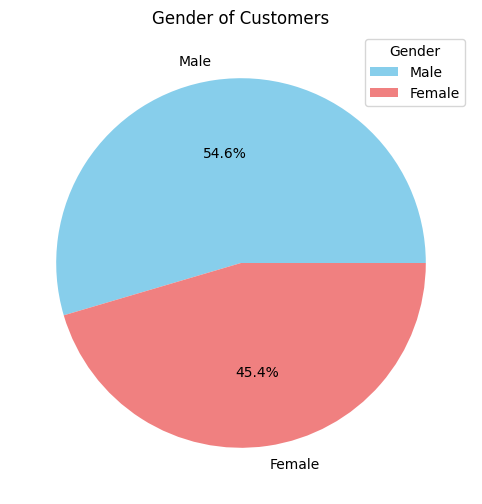

In [ ]:
# Plot a pie chart to show the proportion of customers by gender

plt.figure(figsize = (10, 6))

plt.pie(churn_df['Gender'].value_counts(), labels = churn_df['Gender'].value_counts().index, autopct = '%1.1f%%', colors = ['skyblue', 'lightcoral'])
plt.title('Gender of Customers')
plt.legend(title = 'Gender')
plt.show()

#####Age

In [ ]:
# Count of customers by age group

churn_df['CategorizedAge'].value_counts()

,count
CategorizedAge,
Mid-Career Adults,3981
Early Career Adults,3222
Late Career Adults,1458
Near-Retirement Adults,600
Young Adults,457
Retired Adults,282


In [ ]:
# Count of customers by age group, represented as percentages

churn_df['CategorizedAge'].value_counts(normalize = True)

,proportion
CategorizedAge,
Mid-Career Adults,0.3981
Early Career Adults,0.3222
Late Career Adults,0.1458
Near-Retirement Adults,0.0600
Young Adults,0.0457
Retired Adults,0.0282


In [ ]:
# Generate descriptive statistics to identify the distribution, central tendency and spread of customers' ages

churn_df['Age'].describe()

,Age
count,10000.000000
mean,38.921800
std,10.487806
min,18.000000
25%,32.000000
50%,37.000000
75%,44.000000
max,92.000000


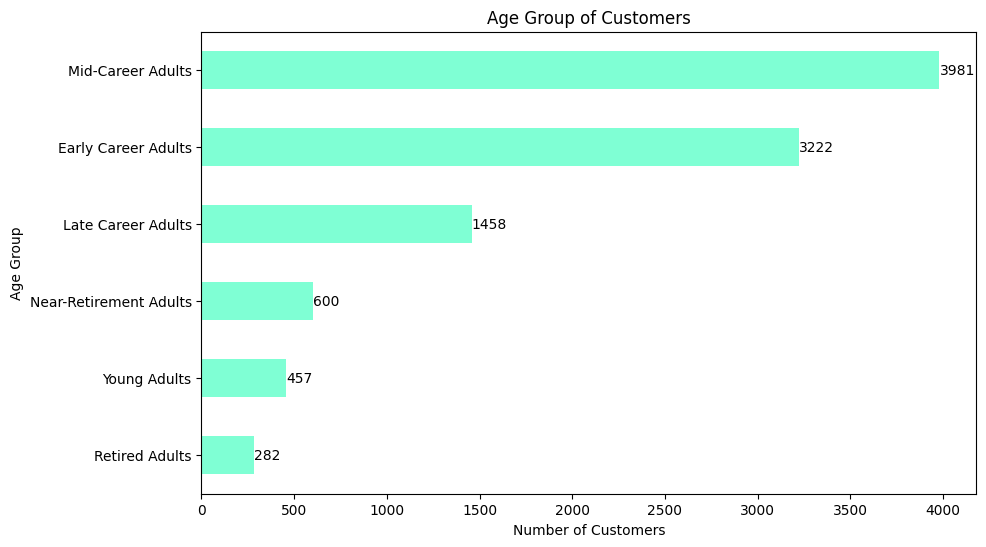

In [ ]:
# Plot a horizontal bar chart to show the distribution of customers' age groups

plt.figure(figsize = (10, 6))

churn_df['CategorizedAge'].value_counts(ascending = True).plot(kind = 'barh', color = 'aquamarine')
plt.title('Age Group of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Age Group')
plt.xticks(rotation = 360)

for index, value in enumerate(churn_df['CategorizedAge'].value_counts(ascending = True)):
    plt.text(value, index, str(value), va = 'center')

plt.grid(False)
plt.show()

#####Geography

In [ ]:
# Count of customers by geography

churn_df['Geography'].value_counts()

,count
Geography,
France,5014
Germany,2509
Spain,2477


In [ ]:
# Count of customers by geography, represented as percentages

churn_df['Geography'].value_counts(normalize = True)

,proportion
Geography,
France,0.5014
Germany,0.2509
Spain,0.2477


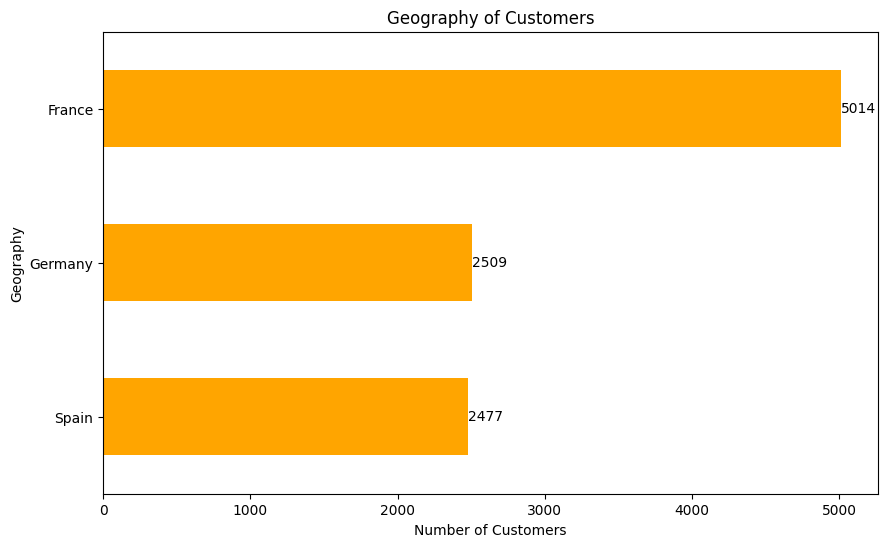

In [ ]:
# Plot a horizontal bar chart to show the distribution of customers' geography

plt.figure(figsize=(10, 6))

churn_df['Geography'].value_counts(ascending = True).plot(kind = 'barh', color = 'orange')
plt.title('Geography of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Geography')
plt.xticks(rotation = 360)

for index, value in enumerate(churn_df['Geography'].value_counts(ascending = True)):
    plt.text(value, index, str(value), va = 'center')

plt.grid(False)
plt.show()

####Financial Information

#####Balance

In [ ]:
# Generate descriptive statistics to identify the distribution, central tendency and spread of customers' account balance

churn_df['Balance'].describe()

,Balance
count,10000.000000
mean,76485.889288
std,62397.405202
min,0.000000
25%,0.000000
50%,97198.540000
75%,127644.240000
max,250898.090000


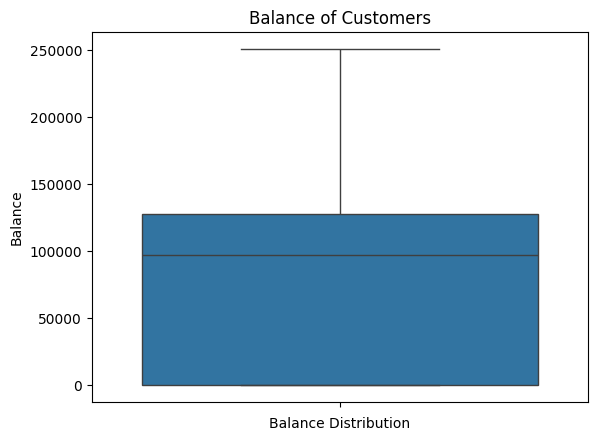

In [ ]:
# Plot a boxplot to show the distribution of customers' account balance

sns.boxplot(data = churn_df, y = 'Balance')

plt.xlabel('Balance Distribution')
plt.title('Balance of Customers')
plt.ylabel('Balance')
plt.grid(False)
plt.show()

#####Estimated Salary

In [ ]:
# Generate descriptive statistics to identify the distribution, central tendency and spread of customers' estimated salary

churn_df['EstimatedSalary'].describe()

,EstimatedSalary
count,10000.000000
mean,100090.239881
std,57510.492818
min,11.580000
25%,51002.110000
50%,100193.915000
75%,149388.247500
max,199992.480000


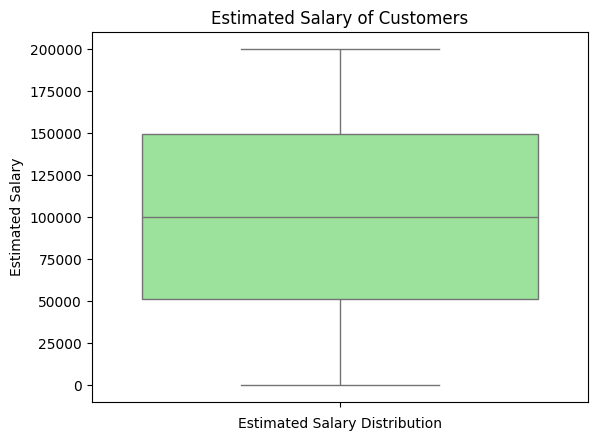

In [ ]:
# Plot a boxplot to show the distribution of customers' estimated salary

sns.boxplot(data = churn_df, y = 'EstimatedSalary', color = 'lightgreen')

plt.xlabel('Estimated Salary Distribution')
plt.ylabel('Estimated Salary')
plt.title('Estimated Salary of Customers')
plt.grid(False)
plt.show()

#####Credit Score Rating

In [ ]:
# Count of customers by credit score rating

churn_df['CategorizedCreditScore'].value_counts()

,count
CategorizedCreditScore,
Fair,3331
Good,2428
Poor,2362
Very Good,1224
Exceptional,655


In [ ]:
# Count of customers by credit score group, represented as rating

churn_df['CategorizedCreditScore'].value_counts(normalize = True)

,proportion
CategorizedCreditScore,
Fair,0.3331
Good,0.2428
Poor,0.2362
Very Good,0.1224
Exceptional,0.0655


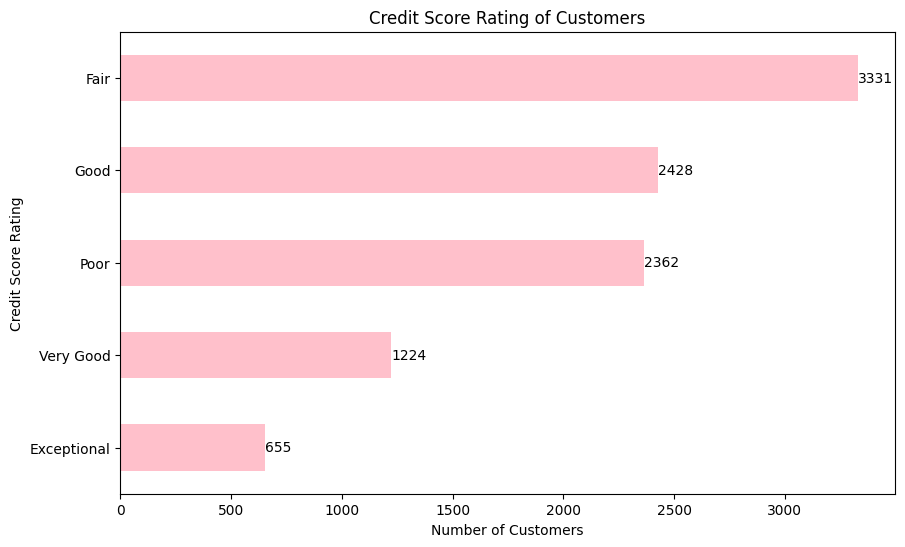

In [ ]:
# Plot a horizontal bar chart to show the distribution of customers' credit score rating

plt.figure(figsize=(10, 6))

churn_df['CategorizedCreditScore'].value_counts(ascending = True).plot(kind = 'barh', color = 'pink')
plt.title('Credit Score Rating of Customers')
plt.xlabel('Number of Customers')
plt.ylabel('Credit Score Rating')
plt.xticks(rotation = 360)

for index, value in enumerate(churn_df['CategorizedCreditScore'].value_counts(ascending = True)):
    plt.text(value, index, str(value), va = 'center')

plt.grid(False)
plt.show()

#####Number of Products Held

In [ ]:
# Count of customers by number of products held

churn_df['NumOfProducts'].value_counts()

,count
NumOfProducts,
1,5084
2,4590
3,266
4,60


In [ ]:
# Count of customers by number of products held, represented as percentages

churn_df['NumOfProducts'].value_counts(normalize = True)

,proportion
NumOfProducts,
1,0.5084
2,0.4590
3,0.0266
4,0.0060


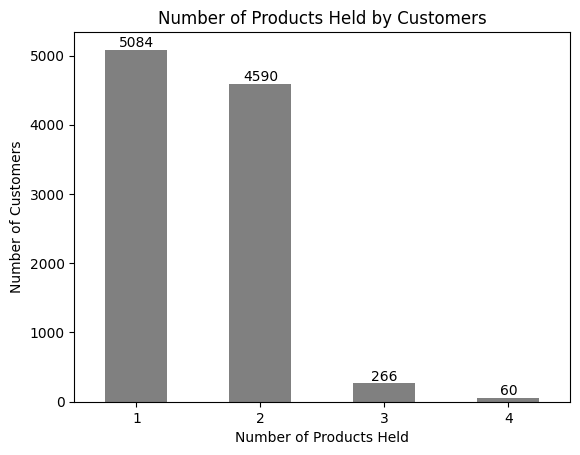

In [ ]:
# Plot a vertical bar chart to show the distribution of the number of products held by customers

churn_df['NumOfProducts'].value_counts().plot(kind = 'bar', color = 'gray')

plt.title('Number of Products Held by Customers')
plt.xlabel('Number of Products Held')
plt.ylabel('Number of Customers')
plt.xticks(rotation = 360)

for index, value in enumerate(churn_df['NumOfProducts'].value_counts()):
    plt.text(index, value, str(value), ha = 'center', va = 'bottom')

plt.grid(False)
plt.show()

#####Credit Card Holder

In [ ]:
# Count of customers holding a credit card

churn_df['HasCrCard'].value_counts()

,count
HasCrCard,
Yes,7055
No,2945


In [ ]:
# Count of customers holding a credit card, represented as percentages

churn_df['HasCrCard'].value_counts(normalize = True)

,proportion
HasCrCard,
Yes,0.7055
No,0.2945


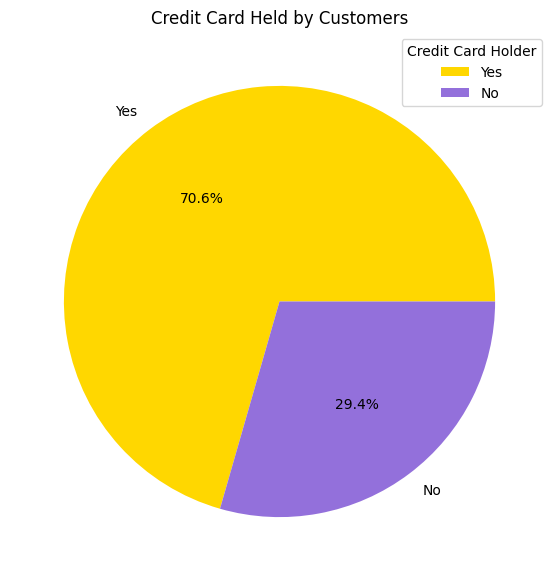

In [ ]:
# Plot a pie chart to show the proportion of customers holding a credit card

plt.figure(figsize = (10, 7))

plt.pie(churn_df['HasCrCard'].value_counts(), labels = churn_df['HasCrCard'].value_counts().index, autopct = '%1.1f%%', colors = ['gold', 'mediumpurple'])
plt.title('Credit Card Held by Customers')
plt.legend(title = 'Credit Card Holder')
plt.show()

#####Tenure

In [ ]:
# Count of customers by tenure

churn_df['Tenure'].value_counts()

,count
Tenure,
2,1048
1,1035
7,1028
8,1025
5,1012
3,1009
4,989
9,984
6,967


In [ ]:
# Percentage of customers by tenure, represented as percentages

churn_df['Tenure'].value_counts(normalize = True)

,proportion
Tenure,
2,0.1048
1,0.1035
7,0.1028
8,0.1025
5,0.1012
3,0.1009
4,0.0989
9,0.0984
6,0.0967


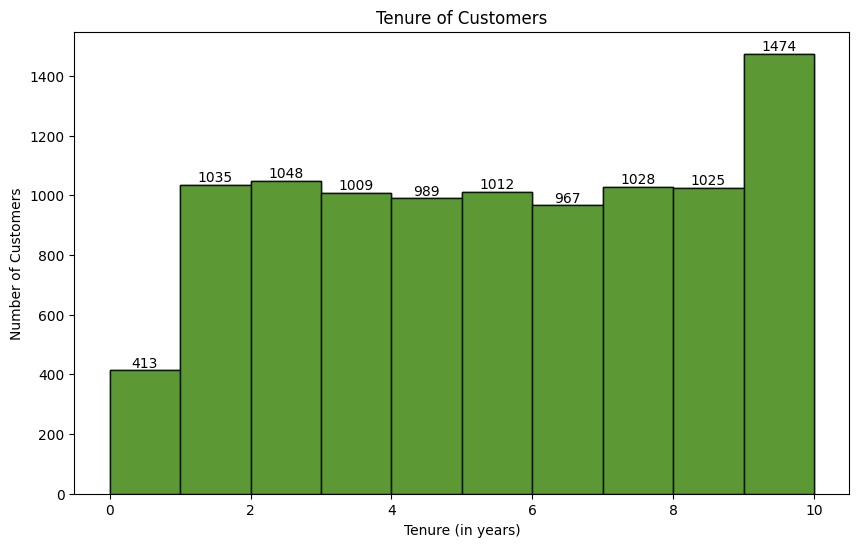

In [ ]:
# Plot a histogram to show the distrbution of customers by tenure

plt.figure(figsize=(10, 6))

plt.hist(churn_df['Tenure'], bins = 10, edgecolor = 'k', alpha=0.7)

plt.title('Tenure of Customers')
plt.xlabel('Tenure (in years)')
plt.ylabel('Number of Customers')

bin_edges = plt.hist(churn_df['Tenure'], bins=10, edgecolor = 'k', alpha=0.7)[1]
for count, edge in zip(plt.hist(churn_df['Tenure'], bins = 10, edgecolor = 'k', alpha = 0.7)[0], bin_edges):
    plt.text(edge + 0.5, count, str(int(count)), ha = 'center', va = 'bottom')

plt.grid(False)
plt.show()

#####Activeness as a Member

In [ ]:
# Count of customers by activeness as a member

churn_df['IsActiveMember'].value_counts()

,count
IsActiveMember,
Yes,5151
No,4849


In [ ]:
# Count of customers by activeness as a member, represented as percentages

churn_df['IsActiveMember'].value_counts(normalize = True)

,proportion
IsActiveMember,
Yes,0.5151
No,0.4849


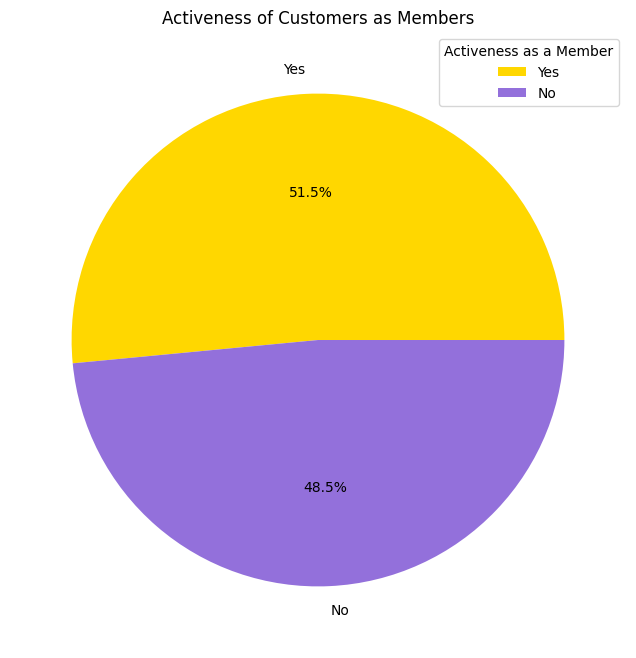

In [ ]:
# Plot a pie chart to show the proportion of customers by activeness as a member

plt.figure(figsize = (10, 8))

plt.pie(churn_df['IsActiveMember'].value_counts(), labels = churn_df['IsActiveMember'].value_counts().index, autopct = '%1.1f%%', colors = ['gold', 'mediumpurple'])
plt.title('Activeness of Customers as Members')
plt.legend(title = 'Activeness as a Member')
plt.show()

#####Churn

In [ ]:
# Count of customers by churn

churn_df['Exited'].value_counts()

,count
Exited,
No,7963
Yes,2037


In [ ]:
# Count of customers by churn, represented as percentages

churn_df['Exited'].value_counts(normalize = True)

,proportion
Exited,
No,0.7963
Yes,0.2037


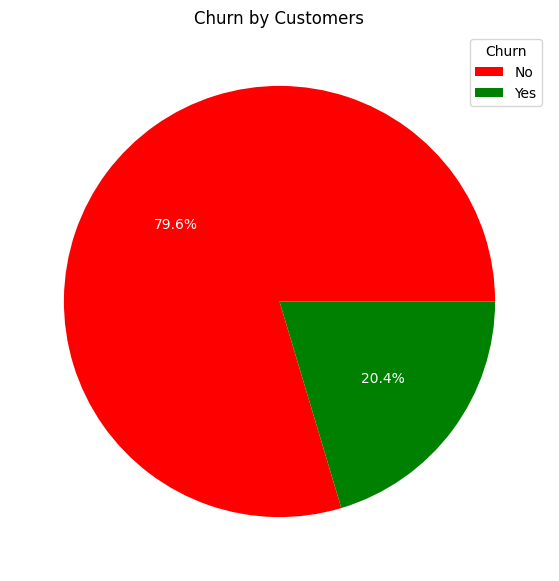

In [ ]:
# Custom function to change the color of the text in the pie chart

def func(pct):
    return '{:.1f}%'.format(pct)

plt.figure(figsize = (10, 7))

# Plot a pie chart to show the proportion of customers by churn
plt.pie(churn_df['Exited'].value_counts(), labels = churn_df['Exited'].value_counts().index, autopct = lambda pct: func(pct), colors = ['Red', 'Green'], textprops = {'color': 'white'})
plt.title('Churn by Customers')
plt.legend(title = 'Churn')
plt.show()

###Bivariate Analysis: Multiple Variable Analysis

In [ ]:
# Define colors for representing customer churn in visualizations, with No (no churn) represented in green and Yes (churn) represented in red

churn_countplotcolors = {'Yes': 'Red', 'No': 'Green'}

####Relationship between Churn and Demographics

#####Churn and Gender

In [ ]:
# Count of customer churn by gender

churn_df.groupby('Gender')['Exited'].value_counts()

<ipython-input-65-b98e951d3c29>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('Gender')['Exited'].value_counts()


Gender  Exited
Female  No        3404
        Yes       1139
Male    No        4559
        Yes        898
Name: count, dtype: int64

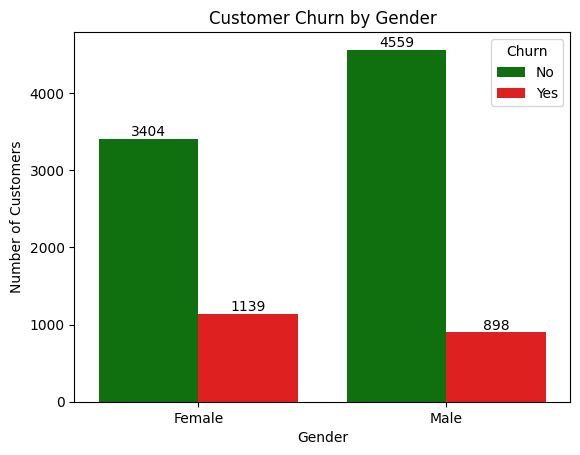

In [ ]:
# Plot a count plot to show the distribution of customer churn by gender

churn_gender = sns.countplot(x = 'Gender', hue = 'Exited', data = churn_df, palette = churn_countplotcolors)

plt.title('Customer Churn by Gender')
plt.xlabel('Gender')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')

churn_gender.bar_label(churn_gender.containers[0])
churn_gender.bar_label(churn_gender.containers[1])

plt.grid(False)
plt.show()

#####Churn and Age

In [ ]:
# Count of customer churn by age group

churn_df.groupby('CategorizedAge')['Exited'].value_counts()

<ipython-input-67-cd2a60695bdc>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('CategorizedAge')['Exited'].value_counts()


CategorizedAge          Exited
Early Career Adults     No        2972
                        Yes        250
Late Career Adults      No         756
                        Yes        702
Mid-Career Adults       No        3278
                        Yes        703
Near-Retirement Adults  No         301
                        Yes        299
Retired Adults          No         239
                        Yes         43
Young Adults            No         417
                        Yes         40
Name: count, dtype: int64

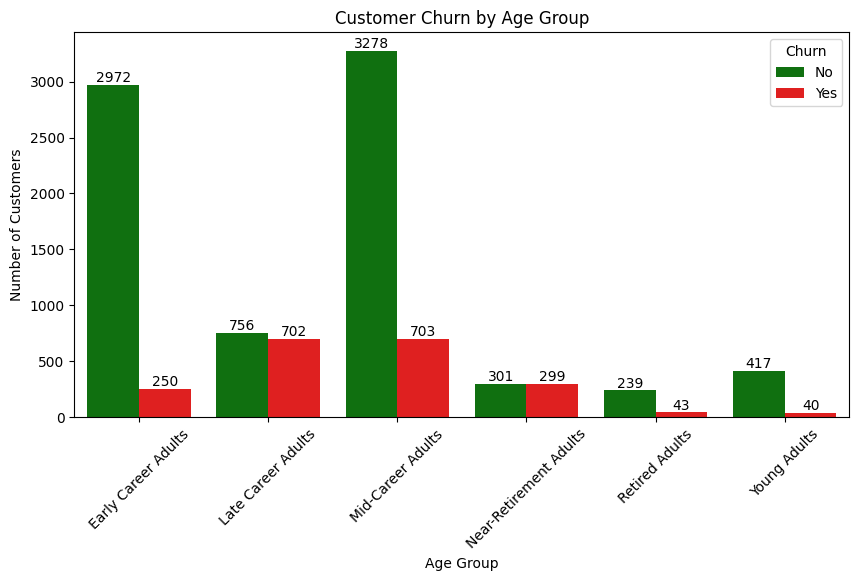

In [ ]:
# Plot a count plot to show the distribution of customer churn by gender

plt.figure(figsize = (10, 5))

churn_categorizedage = sns.countplot(x = 'CategorizedAge', hue = 'Exited', data = churn_df, palette = churn_countplotcolors)

plt.title('Customer Churn by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
plt.xticks(rotation=45)

churn_categorizedage.bar_label(churn_categorizedage.containers[0])
churn_categorizedage.bar_label(churn_categorizedage.containers[1])

plt.grid(False)
plt.show()

#####Churn and Geography

In [ ]:
# Count of customer churn by geography

churn_df.groupby('Geography')['Exited'].value_counts()

<ipython-input-69-6153d40bbbea>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('Geography')['Exited'].value_counts()


Geography  Exited
France     No        4204
           Yes        810
Germany    No        1695
           Yes        814
Spain      No        2064
           Yes        413
Name: count, dtype: int64

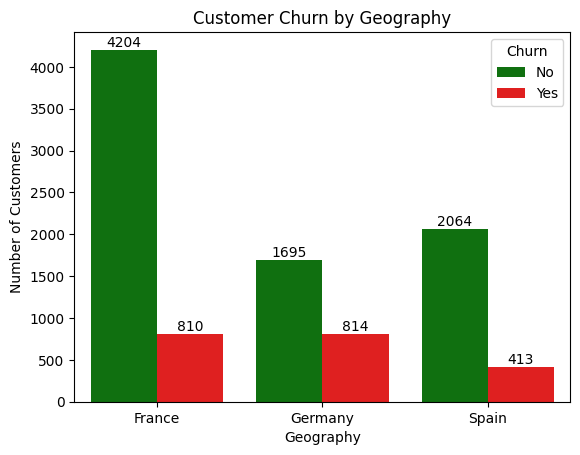

In [ ]:
# Plot a count plot to show the distribution of customer churn by geography

churn_geography = sns.countplot(x = 'Geography', hue = 'Exited', data = churn_df, palette = churn_countplotcolors)
plt.title('Customer Churn by Geography')
plt.xlabel('Geography')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')

churn_geography.bar_label(churn_geography.containers[0])
churn_geography.bar_label(churn_geography.containers[1])

plt.grid(False)
plt.show()

####Relationship between Churn and Financial Information

#####Churn and Balance

In [ ]:
# Generate descriptive statistics to identify the distribution, central tendency and spread of customer churn by balance

churn_df.groupby('Exited')['Balance'].describe()

<ipython-input-71-666785194e0d>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('Exited')['Balance'].describe()


,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
No,7963.0,72745.296779,62848.040701,0.0,0.00,92072.68,126410.28,221532.80
Yes,2037.0,91108.539337,58360.794816,0.0,38340.02,109349.29,131433.33,250898.09


<ipython-input-72-2de1f19ded3f>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Exited', y = 'Balance', data = churn_df, palette = churn_countplotcolors)


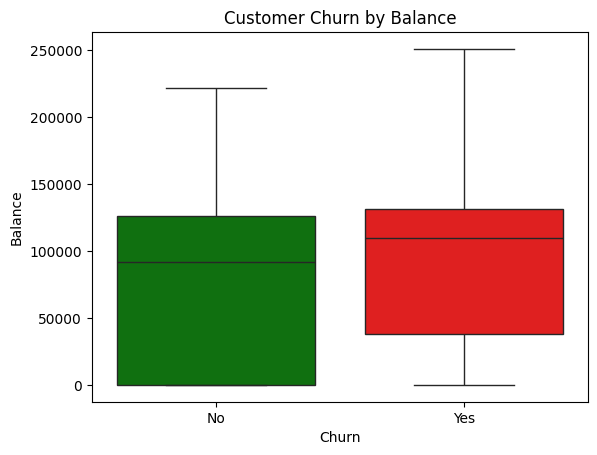

In [ ]:
# Plot a boxplot to show the distribution of customer churn by balance

sns.boxplot(x = 'Exited', y = 'Balance', data = churn_df, palette = churn_countplotcolors)
plt.title('Customer Churn by Balance')
plt.xlabel('Churn')
plt.ylabel('Balance')
plt.show()

#####Churn and Estimated Salary

In [ ]:
# Generate descriptive statistics to identify the distribution, central tendency and spread of customer churn by estimated salary

churn_df.groupby('Exited')['EstimatedSalary'].describe()

<ipython-input-73-df0040acef4e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('Exited')['EstimatedSalary'].describe()


,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
No,7963.0,99738.391772,57405.586966,90.07,50783.49,99645.04,148609.955,199992.48
Yes,2037.0,101465.677531,57912.418071,11.58,51907.72,102460.84,152422.910,199808.10


<ipython-input-74-a22da36a650c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = churn_df, palette = churn_countplotcolors)


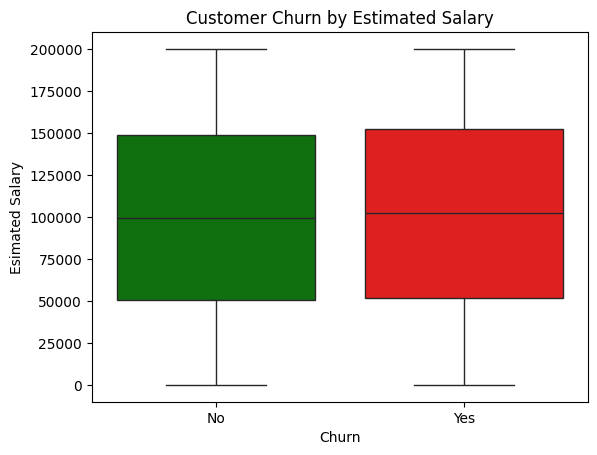

In [ ]:
# Plot a boxplot to show the distribution of customer churn by estimated salary

sns.boxplot(x = 'Exited', y = 'EstimatedSalary', data = churn_df, palette = churn_countplotcolors)

plt.title('Customer Churn by Estimated Salary')
plt.xlabel('Churn')
plt.ylabel('Esimated Salary')
plt.show()

#####Churn and Credit Score Rating

In [ ]:
# Count of customer churn by credit score rating

churn_df.groupby('CategorizedCreditScore')['Exited'].value_counts()

<ipython-input-75-fdba369c5ea1>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('CategorizedCreditScore')['Exited'].value_counts()


CategorizedCreditScore  Exited
Exceptional             No         527
                        Yes        128
Fair                    No        2646
                        Yes        685
Good                    No        1976
                        Yes        452
Poor                    No        1842
                        Yes        520
Very Good               No         972
                        Yes        252
Name: count, dtype: int64

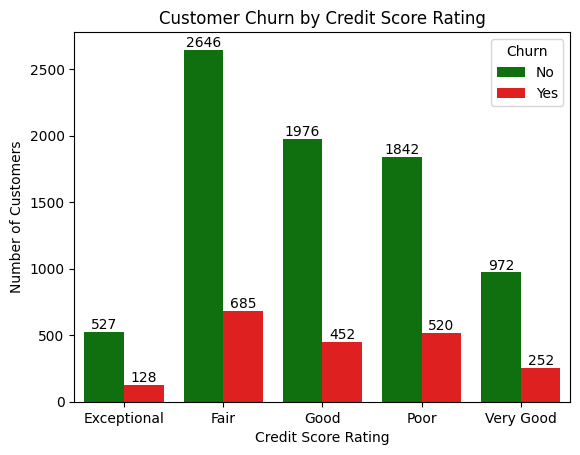

In [ ]:
# Plot a count plot to show the distribution of customer churn by credit score rating

churn_creditscore = sns.countplot(x = 'CategorizedCreditScore', hue = 'Exited', data = churn_df, palette = churn_countplotcolors)
plt.title('Customer Churn by Credit Score Rating')
plt.xlabel('Credit Score Rating')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
churn_creditscore.bar_label(churn_creditscore.containers[0])
churn_creditscore.bar_label(churn_creditscore.containers[1])
plt.show()

#####Churn and Number of Products Held

In [ ]:
# Count of customer churn by number of products held

churn_df.groupby('NumOfProducts')['Exited'].value_counts()

<ipython-input-77-b39b30451f48>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('NumOfProducts')['Exited'].value_counts()


NumOfProducts  Exited
1              No        3675
               Yes       1409
2              No        4242
               Yes        348
3              Yes        220
               No          46
4              Yes         60
               No           0
Name: count, dtype: int64

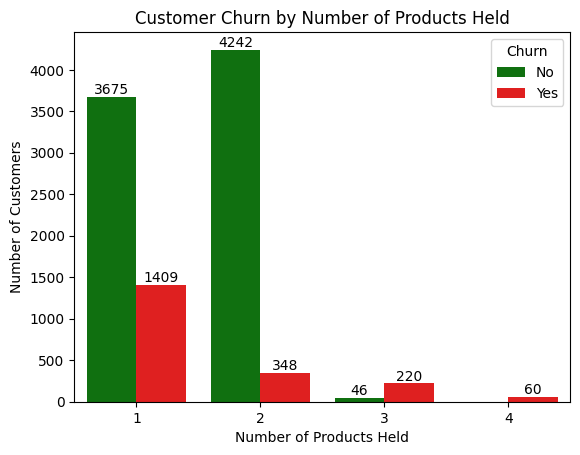

In [ ]:
# Plot a count plot to show the distribution of customer churn by number of products held

churn_numproducts = sns.countplot(x = 'NumOfProducts', hue = 'Exited', data = churn_df, palette = churn_countplotcolors)
plt.title('Customer Churn by Number of Products Held')
plt.xlabel('Number of Products Held')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
churn_numproducts.bar_label(churn_numproducts.containers[0])
churn_numproducts.bar_label(churn_numproducts.containers[1])
plt.show()

#####Churn and Credit Card Holder

In [ ]:
# Count of customer churn by credit card holder

churn_df.groupby('HasCrCard')['Exited'].value_counts()

<ipython-input-79-b00cce796a62>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('HasCrCard')['Exited'].value_counts()


HasCrCard  Exited
No         No        2332
           Yes        613
Yes        No        5631
           Yes       1424
Name: count, dtype: int64

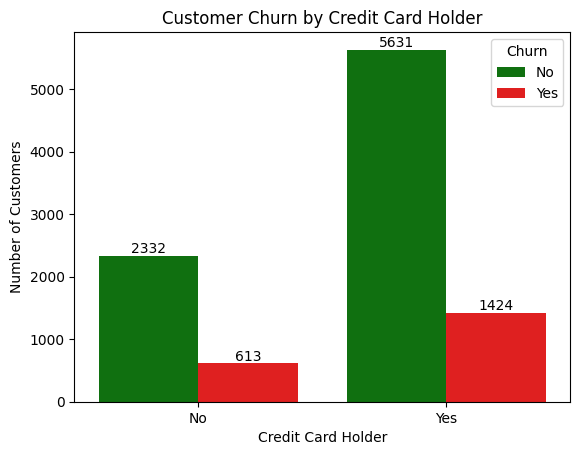

In [ ]:
# Plot a count plot to show the distribution of customer churn by credit card holder

churn_ccowner = sns.countplot(x = 'HasCrCard', hue = 'Exited', data = churn_df, palette = churn_countplotcolors)
plt.title('Customer Churn by Credit Card Holder')
plt.xlabel('Credit Card Holder')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
churn_ccowner.bar_label(churn_ccowner.containers[0])
churn_ccowner.bar_label(churn_ccowner.containers[1])
plt.show()

#####Churn and Tenure

In [ ]:
# Generate descriptive statistics to identify the distribution, central tendency and spread of customer churn by tenure

churn_df.groupby('Exited')['Tenure'].describe()

<ipython-input-81-e51db1910883>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('Exited')['Tenure'].describe()


,count,mean,std,min,25%,50%,75%,max
Exited,,,,,,,,
No,7963.0,5.033279,2.880658,0.0,3.0,5.0,7.0,10.0
Yes,2037.0,4.932744,2.936106,0.0,2.0,5.0,8.0,10.0


<ipython-input-82-3261db916e05>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x = 'Exited', y = 'Tenure', data = churn_df, palette = churn_countplotcolors)


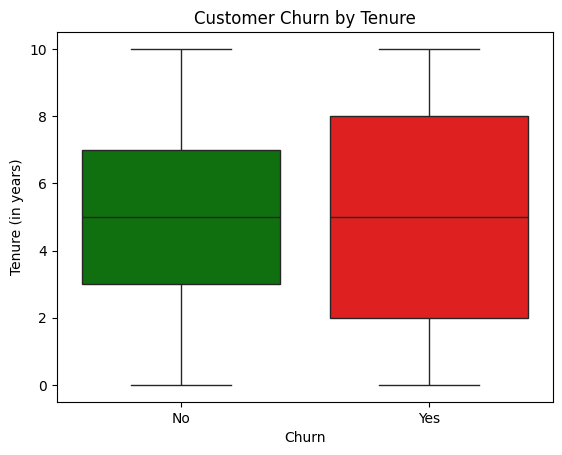

In [ ]:
# Plot a boxplot to show the distribution of customer churn by tenure

sns.boxplot(x = 'Exited', y = 'Tenure', data = churn_df, palette = churn_countplotcolors)

plt.title('Customer Churn by Tenure')
plt.xlabel('Churn')
plt.ylabel('Tenure (in years)')
plt.show()

#####Churn and Activeness as a Member

In [ ]:
# Count of customer churn by activeness as a member

churn_df.groupby('IsActiveMember')['Exited'].value_counts()

<ipython-input-83-13cf2f81c38e>:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  churn_df.groupby('IsActiveMember')['Exited'].value_counts()


IsActiveMember  Exited
No              No        3547
                Yes       1302
Yes             No        4416
                Yes        735
Name: count, dtype: int64

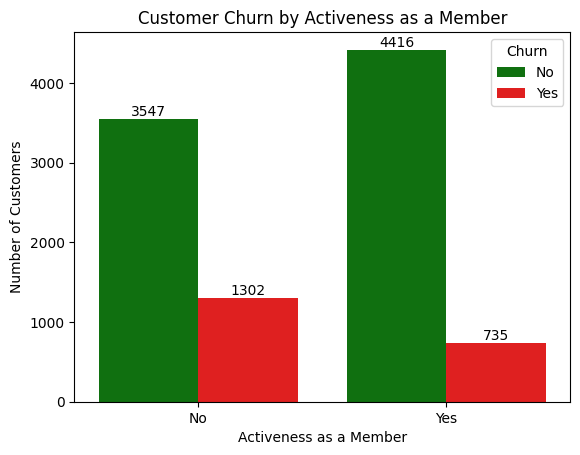

In [ ]:
# Plot a count plot to show the distribution of customer churn by activeness as a member

churn_activemember = sns.countplot(x = 'IsActiveMember', hue = 'Exited', data = churn_df, palette = churn_countplotcolors)
plt.title('Customer Churn by Activeness as a Member')
plt.xlabel('Activeness as a Member')
plt.ylabel('Number of Customers')
plt.legend(title = 'Churn')
churn_activemember.bar_label(churn_activemember.containers[0])
churn_activemember.bar_label(churn_activemember.containers[1])
plt.show()

##**Feature Engineering**

In [ ]:
model_churn_df = churn_df.copy()

In [ ]:
model_churn_df.head(10)

,Gender,Age,CategorizedAge,Geography,Balance,EstimatedSalary,CreditScore,CategorizedCreditScore,NumOfProducts,HasCrCard,Tenure,IsActiveMember,Exited
0,Female,42,Mid-Career Adults,France,0.00,101348.88,619,Fair,1,Yes,2,Yes,Yes
1,Female,41,Mid-Career Adults,Spain,83807.86,112542.58,608,Fair,1,No,1,Yes,No
2,Female,42,Mid-Career Adults,France,159660.80,113931.57,502,Poor,3,Yes,8,No,Yes
3,Female,39,Mid-Career Adults,France,0.00,93826.63,699,Good,2,No,1,No,No
4,Female,43,Mid-Career Adults,Spain,125510.82,79084.10,850,Exceptional,1,Yes,2,Yes,No
5,Male,44,Mid-Career Adults,Spain,113755.78,149756.71,645,Fair,2,Yes,8,No,Yes
6,Male,50,Late Career Adults,France,0.00,10062.80,822,Exceptional,2,Yes,7,Yes,No
7,Female,29,Early Career Adults,Germany,115046.74,119346.88,376,Poor,4,Yes,4,No,Yes
8,Male,44,Mid-Career Adults,France,142051.07,74940.50,501,Poor,2,No,4,Yes,No
9,Male,27,Early Career Adults,France,134603.88,71725.73,684,Good,1,Yes,2,Yes,No


###Selection of Features and Target Variable

In [ ]:
# Separate the features (X) and the target variable (y) from the dataset

X = model_churn_df.drop(columns = 'Exited')  # Features: all columns except 'Exited'
y = model_churn_df['Exited']  # Target variable: 'Exited' column

In [ ]:
# Show the shape of the features (X) dataset

X.shape

(10000, 12)

In [ ]:
# Display the first 10 rows of the features dataset (X)

X.head(10)

,Gender,Age,CategorizedAge,Geography,Balance,EstimatedSalary,CreditScore,CategorizedCreditScore,NumOfProducts,HasCrCard,Tenure,IsActiveMember
0,Female,42,Mid-Career Adults,France,0.00,101348.88,619,Fair,1,Yes,2,Yes
1,Female,41,Mid-Career Adults,Spain,83807.86,112542.58,608,Fair,1,No,1,Yes
2,Female,42,Mid-Career Adults,France,159660.80,113931.57,502,Poor,3,Yes,8,No
3,Female,39,Mid-Career Adults,France,0.00,93826.63,699,Good,2,No,1,No
4,Female,43,Mid-Career Adults,Spain,125510.82,79084.10,850,Exceptional,1,Yes,2,Yes
5,Male,44,Mid-Career Adults,Spain,113755.78,149756.71,645,Fair,2,Yes,8,No
6,Male,50,Late Career Adults,France,0.00,10062.80,822,Exceptional,2,Yes,7,Yes
7,Female,29,Early Career Adults,Germany,115046.74,119346.88,376,Poor,4,Yes,4,No
8,Male,44,Mid-Career Adults,France,142051.07,74940.50,501,Poor,2,No,4,Yes
9,Male,27,Early Career Adults,France,134603.88,71725.73,684,Good,1,Yes,2,Yes


In [ ]:
# Show the shape of the target variable dataset

y.shape

(10000,)

In [ ]:
# Display the first 10 rows of the target variable (y)

y.head(10)

,Exited
0,Yes
1,No
2,Yes
3,No
4,No
5,Yes
6,No
7,Yes
8,No
9,No


###Creation of Dummy Variables

In [ ]:
# Specify the categorical variables that need to be converted into dummy/indicator variables

categorical_variables = ['Gender', 'Geography', 'CategorizedAge', 'CategorizedCreditScore', 'HasCrCard', 'IsActiveMember']

In [ ]:
# Convert categorical variables into dummy variables

X = pd.get_dummies(X, columns = categorical_variables, drop_first = True)

In [ ]:
# Display the first 10 rows of the features dataset after creating dummy variables

X.head(10)

,Age,Balance,EstimatedSalary,CreditScore,NumOfProducts,Tenure,Gender_Male,Geography_Germany,Geography_Spain,CategorizedAge_Late Career Adults,CategorizedAge_Mid-Career Adults,CategorizedAge_Near-Retirement Adults,CategorizedAge_Retired Adults,CategorizedAge_Young Adults,CategorizedCreditScore_Fair,CategorizedCreditScore_Good,CategorizedCreditScore_Poor,CategorizedCreditScore_Very Good,HasCrCard_Yes,IsActiveMember_Yes
0,42,0.00,101348.88,619,1,2,False,False,False,False,True,False,False,False,True,False,False,False,True,True
1,41,83807.86,112542.58,608,1,1,False,False,True,False,True,False,False,False,True,False,False,False,False,True
2,42,159660.80,113931.57,502,3,8,False,False,False,False,True,False,False,False,False,False,True,False,True,False
3,39,0.00,93826.63,699,2,1,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,43,125510.82,79084.10,850,1,2,False,False,True,False,True,False,False,False,False,False,False,False,True,True
5,44,113755.78,149756.71,645,2,8,True,False,True,False,True,False,False,False,True,False,False,False,True,False
6,50,0.00,10062.80,822,2,7,True,False,False,True,False,False,False,False,False,False,False,False,True,True
7,29,115046.74,119346.88,376,4,4,False,True,False,False,False,False,False,False,False,False,True,False,True,False
8,44,142051.07,74940.50,501,2,4,True,False,False,False,True,False,False,False,False,False,True,False,False,True
9,27,134603.88,71725.73,684,1,2,True,False,False,False,False,False,False,False,False,True,False,False,True,True


In [ ]:
# Show the shape of the features dataset after creating dummy variables

X.shape

(10000, 20)

###Standardization of Numerical Features

In [ ]:
# Initialize the StandardScaler

scaler = StandardScaler()

# Select the numerical columns for scaling

numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary']

# Apply scaling to the numerical features

X[numerical_features] = scaler.fit_transform(X[numerical_features])

In [ ]:
# Display the first 10 rows of the features dataset after scaling the numerical features

X.head(10)

,Age,Balance,EstimatedSalary,CreditScore,NumOfProducts,Tenure,Gender_Male,Geography_Germany,Geography_Spain,CategorizedAge_Late Career Adults,CategorizedAge_Mid-Career Adults,CategorizedAge_Near-Retirement Adults,CategorizedAge_Retired Adults,CategorizedAge_Young Adults,CategorizedCreditScore_Fair,CategorizedCreditScore_Good,CategorizedCreditScore_Poor,CategorizedCreditScore_Very Good,HasCrCard_Yes,IsActiveMember_Yes
0,0.293517,-1.225848,0.021886,-0.326221,-0.911583,-1.041760,False,False,False,False,True,False,False,False,True,False,False,False,True,True
1,0.198164,0.117350,0.216534,-0.440036,-0.911583,-1.387538,False,False,True,False,True,False,False,False,True,False,False,False,False,True
2,0.293517,1.333053,0.240687,-1.536794,2.527057,1.032908,False,False,False,False,True,False,False,False,False,False,True,False,True,False
3,0.007457,-1.225848,-0.108918,0.501521,0.807737,-1.387538,False,False,False,False,True,False,False,False,False,True,False,False,False,False
4,0.388871,0.785728,-0.365276,2.063884,-0.911583,-1.041760,False,False,True,False,True,False,False,False,False,False,False,False,True,True
5,0.484225,0.597329,0.863650,-0.057205,0.807737,1.032908,True,False,True,False,True,False,False,False,True,False,False,False,True,False
6,1.056346,-1.225848,-1.565487,1.774174,0.807737,0.687130,True,False,False,True,False,False,False,False,False,False,False,False,True,True
7,-0.946079,0.618019,0.334854,-2.840488,4.246377,-0.350204,False,True,False,False,False,False,False,False,False,False,True,False,True,False
8,0.484225,1.050820,-0.437329,-1.547141,0.807737,-0.350204,True,False,False,False,True,False,False,False,False,False,True,False,False,True
9,-1.136786,0.931463,-0.493230,0.346319,-0.911583,-1.041760,True,False,False,False,False,False,False,False,False,True,False,False,True,True


###Splitting of Data into Training and Testing Sets


In [ ]:
# Split the dataset into training and testing sets with a 70 (train) to 30 (test) ratio

train_X, test_X, train_y, test_y = train_test_split(X, y, test_size = 0.3, random_state = 1)

In [ ]:
# Print the shape of the training and testing sets

print("Training set shape: X_train =", train_X.shape, ", y_train =", train_y.shape)
print("Testing set shape: X_test =", test_X.shape, ", y_test =", test_y.shape)

Training set shape: X_train = (7000, 20) , y_train = (7000,)
Testing set shape: X_test = (3000, 20) , y_test = (3000,)


##**Model Exploration**

####Logistic Regression

#####Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid for tuning all logistic regression models

param_grid_logistic_regression = {
    'C': [0.001, 0.05, 0.5, 5, 50],  # Regularization strength
    'solver': ['liblinear', 'saga']  # Algorithms to use in the optimization problem
}

In [ ]:
# Create a logistic regression model with a maximum of 1,000 iterations

logistic_regression = LogisticRegression(max_iter = 1000, random_state = 1)

#####Full Regression

In [ ]:
# Tune hyperparameters of the full logistic regression model using 5-fold cross-validation, optimizing for accuracy

grid_search_logistic_regression_full = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv = 5, scoring = 'accuracy')

# Fit the model on the training data to discover the best hyperparameters

grid_search_logistic_regression_full.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=1),
             param_grid={'C': [0.001, 0.05, 0.5, 5, 50],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# Show the optimal hyperparameters and the highest cross-validation accuracy attained by the logistic regression model

print("Optimal parameters for the full logistic regression model:", grid_search_logistic_regression_full.best_params_)
print("Highest cross-validation accuracy for the full logistic regression model:", grid_search_logistic_regression_full.best_score_)

Optimal parameters for the full logistic regression model: {'C': 0.5, 'solver': 'saga'}
Highest cross-validation accuracy for the full logistic regression model: 0.8345714285714285


In [ ]:
# Obtain the optimal logistic regression model from the grid search

best_logistic_regression_full = grid_search_logistic_regression_full.best_estimator_

# Train the optimal logistic regression model using the entire training dataset

best_logistic_regression_full.fit(train_X, train_y)

LogisticRegression(C=0.5, max_iter=1000, random_state=1, solver='saga')

In [ ]:
# Predict the target variable for the testing dataset using the optimal full logistic regression model

pred_y_logistic_regression_full = best_logistic_regression_full.predict(test_X)

# Predict the probability estimates for the testing dataset using the optimal full logistic regression model

pred_y_proba_logistic_regression_full = best_logistic_regression_full.predict_proba(test_X)[:, 1]

In [ ]:
# Show the evaluation results for the full logistic regression model

print("Full Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y_logistic_regression_full))
print("\nClassification Report:")
print(classification_report(test_y, pred_y_logistic_regression_full))
print("\nROC-AUC Score:", roc_auc_score(test_y, pred_y_proba_logistic_regression_full))

Full Logistic Regression
Confusion Matrix:
[[2272  101]
 [ 424  203]]

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.96      0.90      2373
         Yes       0.67      0.32      0.44       627

    accuracy                           0.82      3000
   macro avg       0.76      0.64      0.67      3000
weighted avg       0.81      0.82      0.80      3000


ROC-AUC Score: 0.7936622193725127


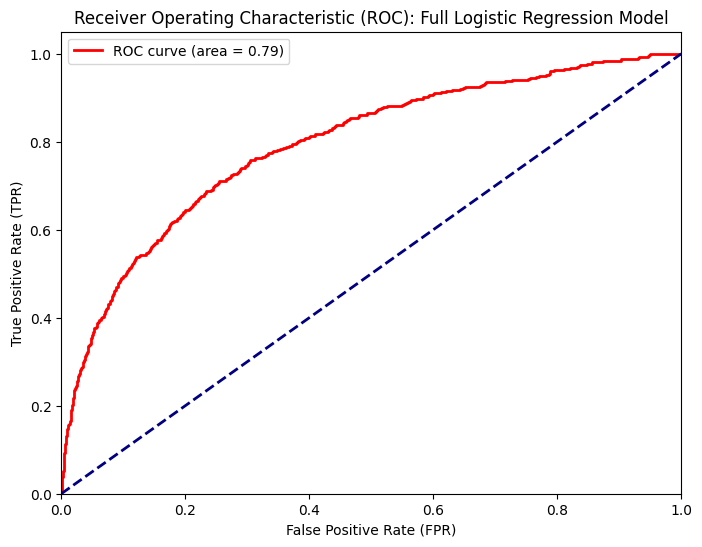

In [ ]:
# Convert 'No' and 'Yes' labels in test_y to 0 and 1, respectively

test_y_numeric = test_y.map({'Yes': 1, 'No': 0})

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve

fpr, tpr, _ = roc_curve(test_y_numeric, pred_y_proba_logistic_regression_full)

# Calculate the area under the ROC curve (AUC) for the ROC curve

roc_auc = auc(fpr, tpr)

# Plot ROC curve for the logistic regression model

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC): Full Logistic Regression Model')
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Get feature names from the training data

feature_names_logistic_regression_full = train_X.columns

# Get the coefficients from the trained full logistic regression model

coefficients_logistic_regression_full = best_logistic_regression_full.coef_[0]

# Create a DataFrame to show feature importance of the full logistic regression model

feature_importance = pd.DataFrame({'Feature': feature_names_logistic_regression_full, 'Importance (Coefficient)': np.abs(coefficients_logistic_regression_full)})

# Sort features by importance for the Full ogistic regression model

feature_importance = feature_importance.sort_values(by = 'Importance (Coefficient)', ascending = False)
feature_importance

,Feature,Importance (Coefficient)
12,CategorizedAge_Retired Adults,1.497435
9,CategorizedAge_Late Career Adults,1.209250
19,IsActiveMember_Yes,1.030178
13,CategorizedAge_Young Adults,0.738969
0,Age,0.729055
7,Geography_Germany,0.726559
11,CategorizedAge_Near-Retirement Adults,0.608040
6,Gender_Male,0.573477
10,CategorizedAge_Mid-Career Adults,0.301269
1,Balance,0.186673


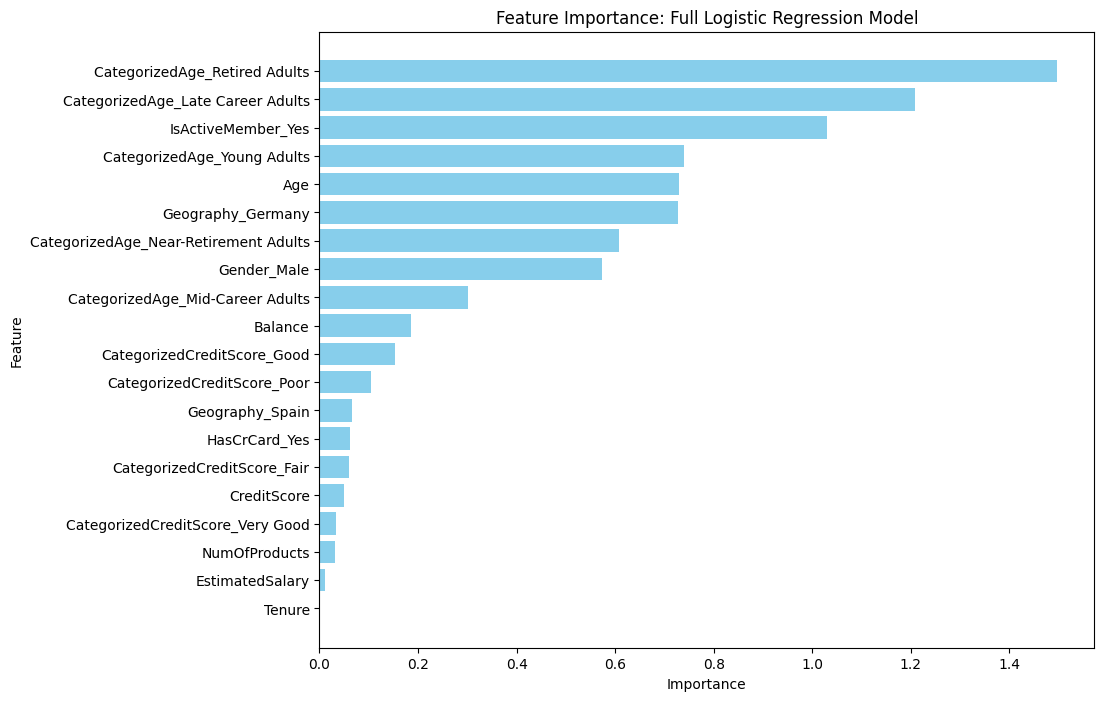

In [ ]:
# Plot feature importance of the full logistic regression model

plt.figure(figsize = (10, 8))
plt.barh(feature_importance['Feature'], feature_importance['Importance (Coefficient)'], color = 'skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Full Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

#####Forward Regression

In [ ]:
# Create a sequential feature selector with a logistic regression model that selects the optimal number of features using forward selection

sfs_forward = SequentialFeatureSelector(logistic_regression, n_features_to_select = 'auto', direction = 'forward')

# Fit the Sequential Feature Selector on the training data to select the best features

sfs_forward.fit(train_X, train_y)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=1))

In [ ]:
# Attain the indices of the selected features from the forward sequential feature selector

selected_features_forward = sfs_forward.get_support(indices = True)

# Build a new training dataset containing only the selected features

train_X_selected_forward = train_X.iloc[:, selected_features_forward]

# Build a new testing dataset containing only the selected features

test_X_selected_forward = test_X.iloc[:, selected_features_forward]

In [ ]:
# Tune hyperparameters of the forward logistic regression model using 5-fold cross-validation, optimizing for accuracy

grid_search_logistic_regression_forward = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv = 5, scoring = 'accuracy')

# Fit the model on the training data to discover the best hyperparameters

grid_search_logistic_regression_forward.fit(train_X_selected_forward, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=1),
             param_grid={'C': [0.001, 0.05, 0.5, 5, 50],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# Show the optimal hyperparameters and the highest cross-validation accuracy attained by the Forward Logistic Regression model

print("Optimal parameters for the forward logistic regression model:", grid_search_logistic_regression_forward.best_params_)
print("Highest cross-validation accuracy for the forward logistic regression model:", grid_search_logistic_regression_forward.best_score_)

Optimal parameters for the forward logistic regression model: {'C': 50, 'solver': 'saga'}
Highest cross-validation accuracy for the forward logistic regression model: 0.834


In [ ]:
# Obtain the optimal forward logistic regression model from the grid search

best_logistic_regression_forward = grid_search_logistic_regression_forward.best_estimator_

# Train the optimal forward logistic regression model using the entire training dataset

best_logistic_regression_forward.fit(train_X_selected_forward, train_y)

LogisticRegression(C=50, max_iter=1000, random_state=1, solver='saga')

In [ ]:
# Predict the target variable for the testing dataset using the optimal forward logistic regression model

pred_y_logistic_regression_forward = best_logistic_regression_forward.predict(test_X_selected_forward)

# Predict the probability estimates for the testing dataset using the optimal forward logistic regression model

pred_y_proba_logistic_regression_forward = best_logistic_regression_forward.predict_proba(test_X_selected_forward)[:, 1]

In [ ]:
# Show the evaluation results for the forward logistic regression model

print("Forward Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y_logistic_regression_forward))
print("\nClassification Report:")
print(classification_report(test_y, pred_y_logistic_regression_forward))
print("\nROC-AUC Score:", roc_auc_score(test_y, pred_y_proba_logistic_regression_forward))

Forward Logistic Regression
Confusion Matrix:
[[2283   90]
 [ 438  189]]

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.96      0.90      2373
         Yes       0.68      0.30      0.42       627

    accuracy                           0.82      3000
   macro avg       0.76      0.63      0.66      3000
weighted avg       0.81      0.82      0.80      3000


ROC-AUC Score: 0.7641989796158404


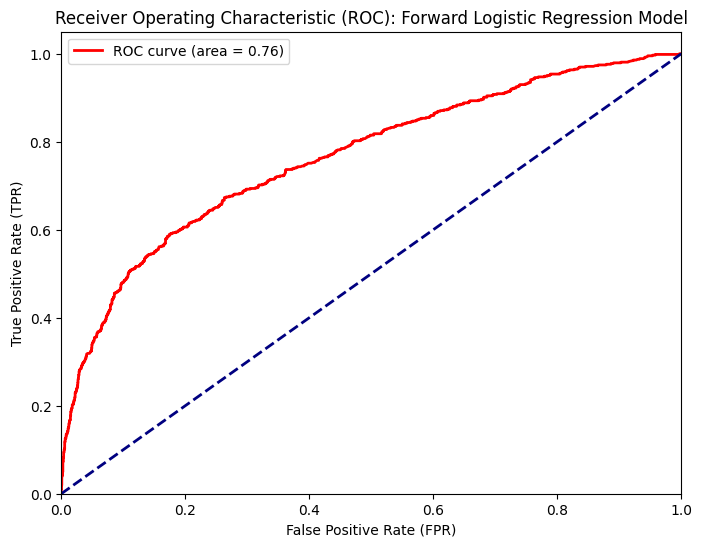

In [ ]:
# Convert 'No' and 'Yes' labels in test_y to 0 and 1, respectively

test_y_numeric = test_y.map({'Yes': 1, 'No': 0})

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve

fpr, tpr, _ = roc_curve(test_y_numeric, pred_y_proba_logistic_regression_forward)

# Calculate the area under the ROC curve (AUC) for the ROC curve

roc_auc = auc(fpr, tpr)

# Plot ROC curve for the Forward Logistic Regression model

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC): Forward Logistic Regression Model')
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Get feature names from the selected features

feature_names_selected_logistic_regression_forward = train_X.columns[selected_features_forward]

# Get the coefficients from the trained forward logistic regression model

coefficients_logistic_regression_forward = best_logistic_regression_forward.coef_[0]

# Create a DataFrame to show feature importance of the forward logistic regression model

feature_importance_logistic_regression_forward = pd.DataFrame({'Feature': feature_names_selected_logistic_regression_forward, 'Importance (Coefficient)': np.abs(coefficients_logistic_regression_forward)})

# Sort features by importance for the forward logistic regression model

feature_importance_logistic_regression_forward = feature_importance_logistic_regression_forward.sort_values(by='Importance (Coefficient)', ascending = False)
feature_importance_logistic_regression_forward

,Feature,Importance (Coefficient)
2,CategorizedAge_Late Career Adults,1.422781
3,CategorizedAge_Near-Retirement Adults,1.108768
9,IsActiveMember_Yes,1.097412
0,Age,0.439096
1,Balance,0.321243
4,CategorizedAge_Young Adults,0.253353
6,CategorizedCreditScore_Good,0.134871
8,HasCrCard_Yes,0.048183
7,CategorizedCreditScore_Very Good,0.027812
5,CategorizedCreditScore_Fair,0.010176


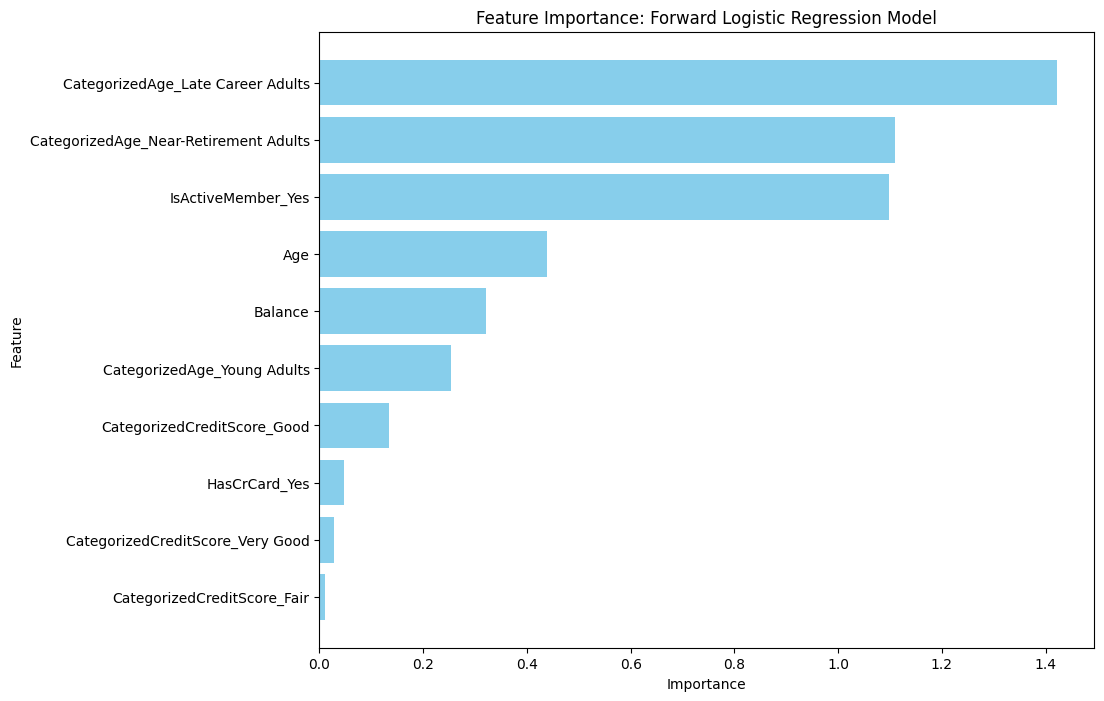

In [ ]:
# Plot feature importance of the forward logistic regression model

plt.figure(figsize = (10, 8))
plt.barh(feature_importance_logistic_regression_forward['Feature'], feature_importance_logistic_regression_forward['Importance (Coefficient)'], color = 'skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Forward Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

#####Backward Regression

In [ ]:
# Create a sequential feature selector with a logistic regression model that selects the optimal number of features using backward selection

sfs_backward = SequentialFeatureSelector(logistic_regression, n_features_to_select = 'auto', direction = 'backward')

# Fit the Sequential Feature Selector on the training data to select the best features

sfs_backward.fit(train_X, train_y)

SequentialFeatureSelector(direction='backward',
                          estimator=LogisticRegression(max_iter=1000,
                                                       random_state=1))

In [ ]:
# Attain the indices of the selected features from the backward sequential feature selector

selected_features_backward = sfs_backward.get_support(indices = True)

# Build a new training dataset containing only the selected features

train_X_selected_backward = train_X.iloc[:, selected_features_backward]

# Build a new testing dataset containing only the selected features

test_X_selected_backward = test_X.iloc[:, selected_features_backward]

In [ ]:
# Tune hyperparameters of the backward logistic regression model using 5-fold cross-validation, optimizing for accuracy

grid_search_logistic_regression_backward = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv = 5, scoring = 'accuracy')

# Fit the model on the training data to discover the best hyperparameters

grid_search_logistic_regression_backward.fit(train_X_selected_backward, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=1),
             param_grid={'C': [0.001, 0.05, 0.5, 5, 50],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# Show the optimal hyperparameters and the highest cross-validation accuracy attained by the backward logistic regression model

print("Optimal parameters for the backward logistic regression model:", grid_search_logistic_regression_backward.best_params_)
print("Highest cross-validation accuracy for the backward logistic regression model:", grid_search_logistic_regression_backward.best_score_)

Optimal parameters for the backward logistic regression model: {'C': 0.5, 'solver': 'liblinear'}
Highest cross-validation accuracy for the backward logistic regression model: 0.8377142857142857


In [ ]:
# Obtain the optimal backward logistic regression model from the grid search

best_logistic_regression_backward = grid_search_logistic_regression_backward.best_estimator_

# Train the optimal backward logistic regression model using the entire training dataset

best_logistic_regression_backward.fit(train_X_selected_backward, train_y)

LogisticRegression(C=0.5, max_iter=1000, random_state=1, solver='liblinear')

In [ ]:
# Predict the target variable for the testing dataset using the optimal backward logistic regression model

pred_y_logistic_regression_backward = best_logistic_regression_backward.predict(test_X_selected_backward)

# Predict the probability estimates for the testing dataset using the optimal backward logistic regression model

pred_y_proba_logistic_regression_backward = best_logistic_regression_backward.predict_proba(test_X_selected_backward)[:, 1]

In [ ]:
# Show the evaluation results for the backward logistic regression model

print("Backward Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y_logistic_regression_backward))
print("\nClassification Report:")
print(classification_report(test_y, pred_y_logistic_regression_backward))
print("\nROC-AUC Score:", roc_auc_score(test_y, pred_y_proba_logistic_regression_backward))

Backward Logistic Regression
Confusion Matrix:
[[2282   91]
 [ 421  206]]

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.96      0.90      2373
         Yes       0.69      0.33      0.45       627

    accuracy                           0.83      3000
   macro avg       0.77      0.65      0.67      3000
weighted avg       0.81      0.83      0.80      3000


ROC-AUC Score: 0.7898087266974086


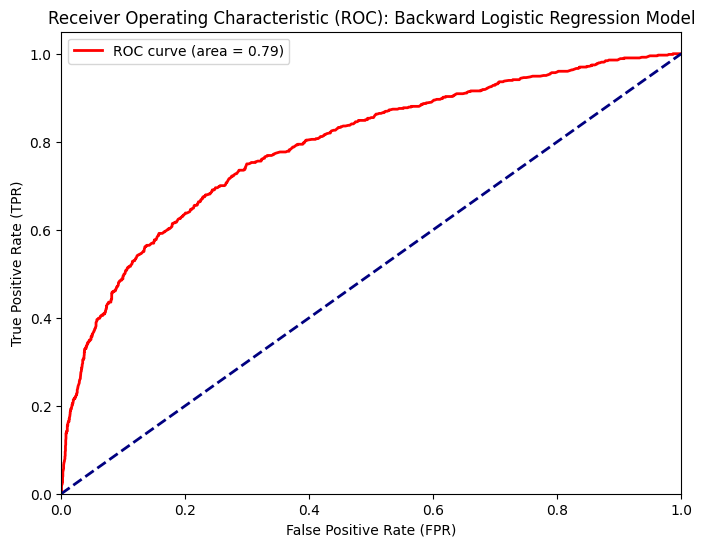

In [ ]:
# Convert 'No' and 'Yes' labels in test_y to 0 and 1, respectively

test_y_numeric = test_y.map({'Yes': 1, 'No': 0})

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve

fpr, tpr, _ = roc_curve(test_y_numeric, pred_y_proba_logistic_regression_backward)

# Calculate the area under the ROC curve (AUC) for the ROC curve

roc_auc = auc(fpr, tpr)

# Plot ROC curve for the backward logistic regression model

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC): Backward Logistic Regression Model')
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Get feature names

feature_names_selected_logistic_regression_backward = train_X.columns[selected_features_backward]

# Get the coefficients from the trained model

coefficients_logistic_regression_backward = best_logistic_regression_backward.coef_[0]

# Create a DataFrame to show feature importance

feature_importance_logistic_regression_backward = pd.DataFrame({'Feature': feature_names_selected_logistic_regression_backward, 'Importance (Coefficient)': np.abs(coefficients_logistic_regression_backward)})

# Sort features by importance

feature_importance_logistic_regression_backward = feature_importance_logistic_regression_backward.sort_values(by = 'Importance (Coefficient)', ascending = False)
feature_importance_logistic_regression_backward

,Feature,Importance (Coefficient)
6,CategorizedAge_Retired Adults,1.326842
3,CategorizedAge_Late Career Adults,1.243868
9,IsActiveMember_Yes,1.036377
2,Geography_Germany,0.863536
5,CategorizedAge_Near-Retirement Adults,0.715886
0,Age,0.655392
1,Gender_Male,0.566809
4,CategorizedAge_Mid-Career Adults,0.267872
8,HasCrCard_Yes,0.081080
7,CategorizedCreditScore_Fair,0.040644


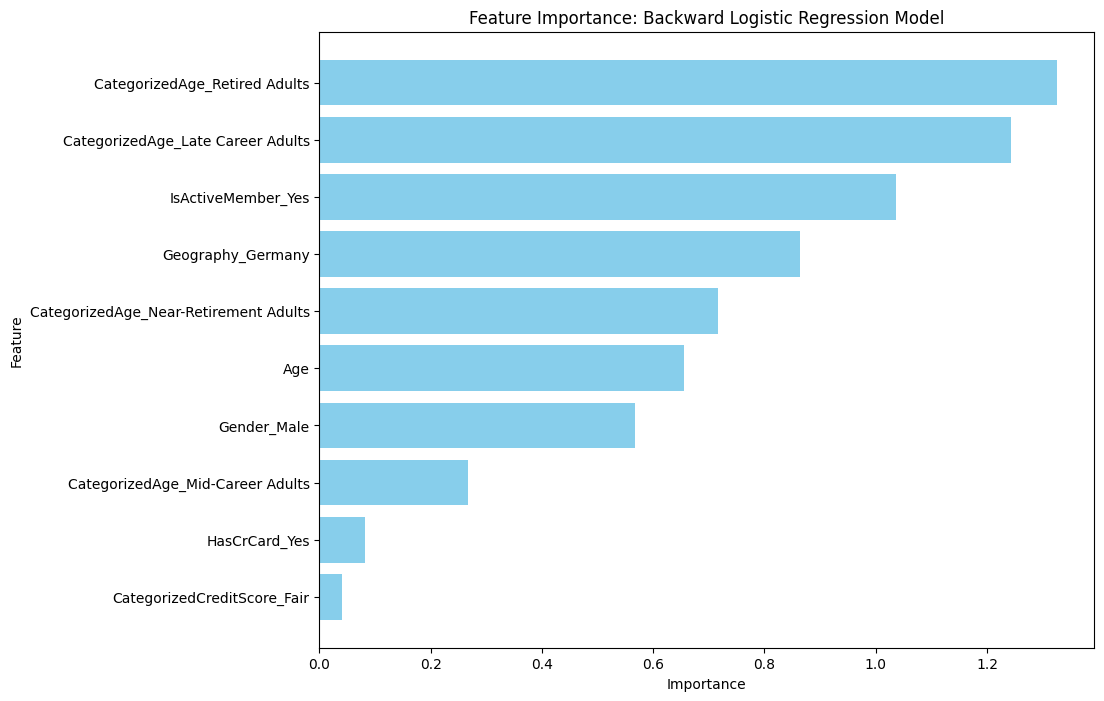

In [ ]:
# Plot feature importance of the backward logistic regression model

plt.figure(figsize = (10, 8))
plt.barh(feature_importance_logistic_regression_backward['Feature'], feature_importance_logistic_regression_backward['Importance (Coefficient)'], color = 'skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Backward Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

#####Stepwise Regression

In [ ]:
# Create a sequential feature selector with a logistic regression model that selects the optimal number of features using stepwise selection

sfs_stepwise = SequentialFeatureSelector(logistic_regression, n_features_to_select = 'auto', direction = 'forward', tol = 1e-3, cv = 5)

# Fit the sequential feature select on the training data to select the best features

sfs_stepwise.fit(train_X, train_y)

SequentialFeatureSelector(estimator=LogisticRegression(max_iter=1000,
                                                       random_state=1),
                          tol=0.001)

In [ ]:
# Attain the indices of the selected features from the stepwise sequential feature selector

selected_features_stepwise = sfs_stepwise.get_support(indices = True)

# Build a new training dataset containing only the selected features

train_X_selected_stepwise = train_X.iloc[:, selected_features_stepwise]

# Build a new testing dataset containing only the selected features

test_X_selected_stepwise = test_X.iloc[:, selected_features_stepwise]

In [ ]:
# Tune hyperparameters of the stepwise logistic regression model using 5-fold cross-validation, optimizing for accuracy

grid_search_logistic_regression_stepwise = GridSearchCV(logistic_regression, param_grid_logistic_regression, cv = 5, scoring = 'accuracy')

# Fit the model on the training data to discover the best hyperparameters

grid_search_logistic_regression_stepwise.fit(train_X_selected_stepwise, train_y)

GridSearchCV(cv=5, estimator=LogisticRegression(max_iter=1000, random_state=1),
             param_grid={'C': [0.001, 0.05, 0.5, 5, 50],
                         'solver': ['liblinear', 'saga']},
             scoring='accuracy')

In [ ]:
# Show the optimal hyperparameters and the highest cross-validation accuracy attained by the stepwise logistic regression model

print("Optimal parameters for the stepwise logistic regression model:", grid_search_logistic_regression_stepwise.best_params_)
print("Highest cross-validation accuracy for the stepwise logistic regression model:", grid_search_logistic_regression_stepwise.best_score_)

Optimal parameters for the stepwise logistic regression model: {'C': 0.5, 'solver': 'liblinear'}
Highest cross-validation accuracy for the stepwise logistic regression model: 0.8322857142857144


In [ ]:
# Obtain the optimal stepwise logistic regression model from the grid search

best_logistic_regression_stepwise = grid_search_logistic_regression_stepwise.best_estimator_

# Train the optimal stepwise logistic regression model using the entire training dataset

best_logistic_regression_stepwise.fit(train_X_selected_stepwise, train_y)

LogisticRegression(C=0.5, max_iter=1000, random_state=1, solver='liblinear')

In [ ]:
# Predict the target variable for the testing dataset using the optimal stepwise logistic regression model

pred_y_logistic_regression_stepwise = best_logistic_regression_stepwise.predict(test_X_selected_stepwise)

# Predict the probability estimates for the testing dataset using the optimal stepwise logistic regression model

pred_y_proba_logistic_regression_stepwise = best_logistic_regression_stepwise.predict_proba(test_X_selected_stepwise)[:, 1]

In [ ]:
# Show the evaluation results for the stepwise logistic regression model

print("Stepwise Logistic Regression")
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y_logistic_regression_stepwise))
print("\nClassification Report:")
print(classification_report(test_y, pred_y_logistic_regression_stepwise))
print("\nROC-AUC Score:", roc_auc_score(test_y, pred_y_proba_logistic_regression_stepwise))

Stepwise Logistic Regression
Confusion Matrix:
[[2290   83]
 [ 439  188]]

Classification Report:
              precision    recall  f1-score   support

          No       0.84      0.97      0.90      2373
         Yes       0.69      0.30      0.42       627

    accuracy                           0.83      3000
   macro avg       0.77      0.63      0.66      3000
weighted avg       0.81      0.83      0.80      3000


ROC-AUC Score: 0.7645410791661373


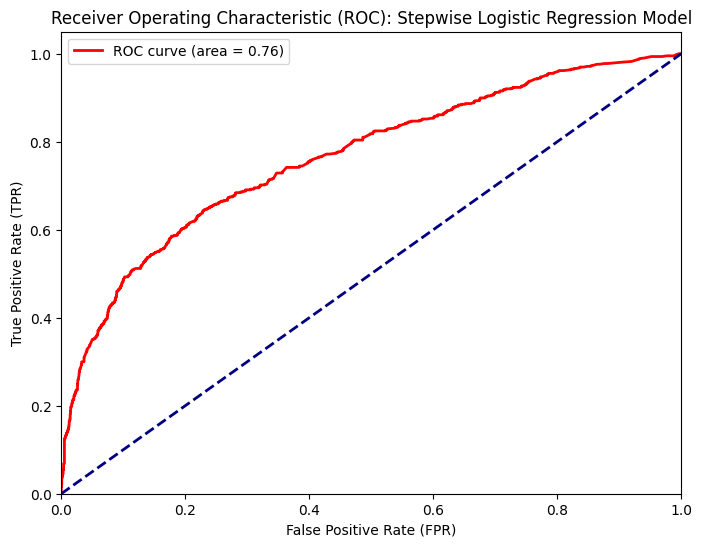

In [ ]:
# Convert 'No' and 'Yes' labels in test_y to 0 and 1, respectively

test_y_numeric = test_y.map({'Yes': 1, 'No': 0})

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve

fpr, tpr, _ = roc_curve(test_y_numeric, pred_y_proba_logistic_regression_stepwise)

# Calculate the area under the ROC curve (AUC) for the ROC curve

roc_auc = auc(fpr, tpr)

# Plot ROC curve for the stepwise logistic regression model

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC): Stepwise Logistic Regression Model')
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Get feature names from the selected features

feature_names_selected_logistic_regression_stepwise = train_X.columns[selected_features_stepwise]

# Get the coefficients from the trained stepwise logistic regression model

coefficients_logistic_regression_stepwise = best_logistic_regression_stepwise.coef_[0]

# Create a DataFrame to show feature importance of the stepwise logistic regression model

feature_importance_logistic_regression_stepwise = pd.DataFrame({'Feature': feature_names_selected_logistic_regression_stepwise, 'Importance (Coefficient)': np.abs(coefficients_logistic_regression_stepwise)})

# Sort features by importance for the stepwise logistic regression model

feature_importance_logistic_regression_stepwise = feature_importance_logistic_regression_stepwise.sort_values(by = 'Importance (Coefficient)', ascending = False)
feature_importance_logistic_regression_stepwise

,Feature,Importance (Coefficient)
2,CategorizedAge_Late Career Adults,1.388693
4,IsActiveMember_Yes,1.086490
3,CategorizedAge_Near-Retirement Adults,1.069136
0,Age,0.434268
1,Balance,0.320709


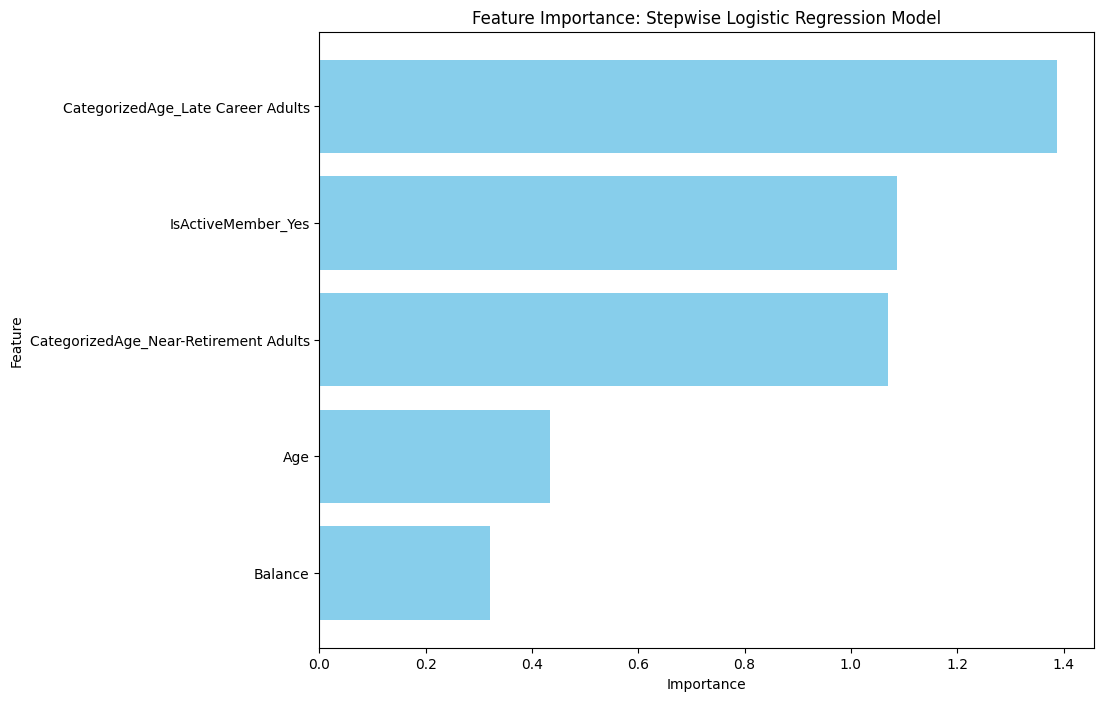

In [ ]:
# Plot feature importance of the stepwise logistic regression model

plt.figure(figsize = (10, 8))
plt.barh(feature_importance_logistic_regression_stepwise['Feature'], feature_importance_logistic_regression_stepwise['Importance (Coefficient)'], color = 'skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Stepwise Logistic Regression Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

####Decision Tree

#####Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid for tuning the decision tree model

param_grid_decision_tree = {
    'max_depth': [2, 3, 6, 9],  # Maximum depth of the tree
    'min_samples_split': [3, 4, 6],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [2, 9, 10]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create a decision tree model

decision_tree = DecisionTreeClassifier(random_state = 1, criterion = 'gini')

# Tune hyperparameters of the decision tree model using 5-fold cross-validation, optimizing for accuracy

grid_search_decision_tree = GridSearchCV(decision_tree, param_grid_decision_tree, cv = 5, scoring = 'accuracy')

# Fit the model on the training data to discover the best hyperparameters

grid_search_decision_tree.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'max_depth': [2, 3, 6, 9],
                         'min_samples_leaf': [2, 9, 10],
                         'min_samples_split': [3, 4, 6]},
             scoring='accuracy')

In [ ]:
# Show the optimal hyperparameters and the highest cross-validation accuracy attained by the decision tree model

print("Optimal parameters for the decision tree model:", grid_search_decision_tree.best_params_)
print("Highest cross-validation accuracy for the decision tree model:", grid_search_decision_tree.best_score_)

Optimal parameters for the decision tree model: {'max_depth': 6, 'min_samples_leaf': 10, 'min_samples_split': 3}
Highest cross-validation accuracy for the decision tree model: 0.8587142857142858


In [ ]:
# Obtain the optimal decision tree model from the grid search

best_decision_tree = grid_search_decision_tree.best_estimator_

# Train the optimal decision tree model using the entire training dataset

best_decision_tree.fit(train_X, train_y)

DecisionTreeClassifier(max_depth=6, min_samples_leaf=10, min_samples_split=3,
                       random_state=1)

In [ ]:
# Predict the target variable for the testing dataset using the optimal decision tree model

pred_y_decision_tree = best_decision_tree.predict(test_X)

# Predict the probability estimates for the testing dataset using the optimal decision tree model

pred_y_proba_decision_tree = best_decision_tree.predict_proba(test_X)[:, 1]

In [ ]:
# Show the evaluation results for the decision tree model

print("Decision Tree")
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y_decision_tree))
print("\nClassification Report:")
print(classification_report(test_y, pred_y_decision_tree))
print("\nROC-AUC Score:", roc_auc_score(test_y, pred_y_proba_decision_tree))

Decision Tree
Confusion Matrix:
[[2295   78]
 [ 337  290]]

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92      2373
         Yes       0.79      0.46      0.58       627

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.75      3000
weighted avg       0.85      0.86      0.85      3000


ROC-AUC Score: 0.8493710140193605


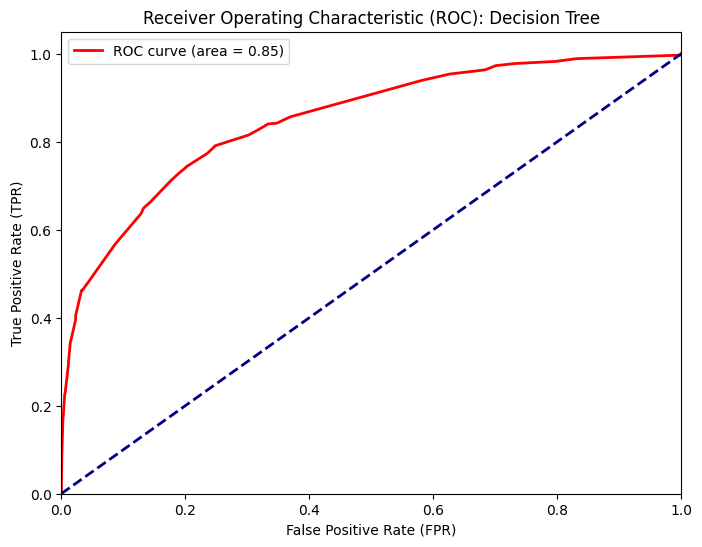

In [ ]:
# Convert 'No' and 'Yes' labels in test_y to 0 and 1, respectively

test_y_numeric = test_y.map({'Yes': 1, 'No': 0})

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve

fpr_dt, tpr_dt, _ = roc_curve(test_y_numeric, pred_y_proba_decision_tree)

# Calculate the area under the ROC curve (AUC) for the ROC curve

roc_auc_dt = auc(fpr_dt, tpr_dt)

# Plot ROC curve for the decision tree model

plt.figure(figsize = (8, 6))
plt.plot(fpr_dt, tpr_dt, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color = 'navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC): Decision Tree')
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Get feature names from the training data

feature_names_decision_tree = train_X.columns

# Get the feature importances from the trained model

importances = best_decision_tree.feature_importances_

# Create a DataFrame to show feature importance

feature_importance_decision_tree = pd.DataFrame({'Feature': feature_names_decision_tree, 'Importance (Gini Impurity)': importances})

# Remove features with zero importance

feature_importance_decision_tree = feature_importance_decision_tree[feature_importance_decision_tree['Importance (Gini Impurity)'] > 0]

# Sort features by importance for the decision tree model

feature_importance_decision_tree = feature_importance_decision_tree.sort_values(by = 'Importance (Gini Impurity)', ascending = False)
feature_importance_decision_tree

,Feature,Importance (Gini Impurity)
0,Age,0.390031
4,NumOfProducts,0.301229
19,IsActiveMember_Yes,0.136671
1,Balance,0.092686
7,Geography_Germany,0.054939
6,Gender_Male,0.008444
2,EstimatedSalary,0.008360
15,CategorizedCreditScore_Good,0.003908
3,CreditScore,0.002981
14,CategorizedCreditScore_Fair,0.000752


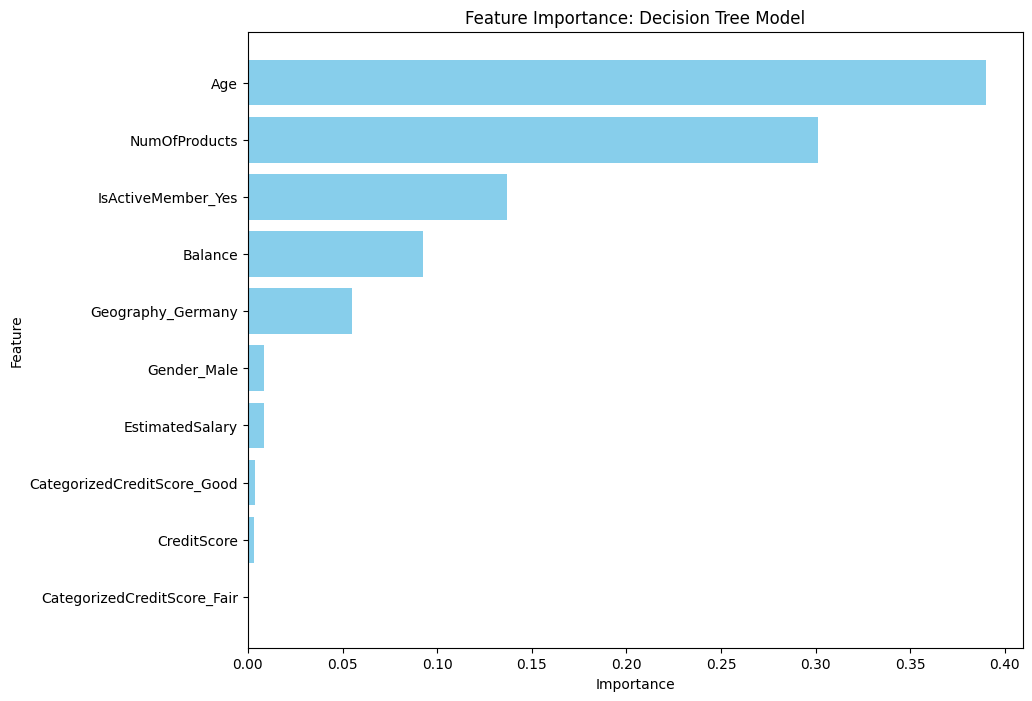

In [ ]:
# Plot feature importance of the decision tree model

plt.figure(figsize = (10, 8))
plt.barh(feature_importance_decision_tree['Feature'], feature_importance_decision_tree['Importance (Gini Impurity)'], color = 'skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Decision Tree Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()

####Random Forest

#####Hyperparameter Tuning

In [ ]:
# Define the hyperparameter grid for tuning the random forest model

param_grid_random_forest = {
    'n_estimators': [50, 150, 175],  # Number of trees in the forest
    'max_depth': [None, 15, 19],  # Maximum depth of the tree
    'min_samples_split': [4, 6, 9],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 3, 10]  # Minimum number of samples required to be at a leaf node
}

In [ ]:
# Create a random forest model

random_forest = RandomForestClassifier(random_state = 1, criterion = 'gini')

# Tune hyperparameters of the random forest model using 5-fold cross-validation, optimizing for accuracy

grid_search_random_forest = GridSearchCV(random_forest, param_grid_random_forest, cv = 5, scoring = 'accuracy')

# Fit the model on the training data to discover the best hyperparameters

grid_search_random_forest.fit(train_X, train_y)

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=1),
             param_grid={'max_depth': [None, 15, 19],
                         'min_samples_leaf': [1, 3, 10],
                         'min_samples_split': [4, 6, 9],
                         'n_estimators': [50, 150, 175]},
             scoring='accuracy')

In [ ]:
# Show the optimal hyperparameters and the highest cross-validation accuracy attained by the random forest model

print("Optimal parameters for the random forest model:", grid_search_random_forest.best_params_)
print("Highest cross-validation accuracy for the random forest model:", grid_search_random_forest.best_score_)

Optimal parameters for the random forest model: {'max_depth': 15, 'min_samples_leaf': 1, 'min_samples_split': 9, 'n_estimators': 150}
Highest cross-validation accuracy for the random forest model: 0.8614285714285714


In [ ]:
# Obtain the optimal random forest model from the grid search

best_random_forest = grid_search_random_forest.best_estimator_

# Train the optimal random forest model using the entire training dataset

best_random_forest.fit(train_X, train_y)

RandomForestClassifier(max_depth=15, min_samples_split=9, n_estimators=150,
                       random_state=1)

In [ ]:
# Predict the target variable for the testing dataset using the optimal random forest model

pred_y_random_forest = best_random_forest.predict(test_X)

# Predict the probability estimates for the testing dataset using the optimal random forest model

pred_y_proba_random_forest = best_random_forest.predict_proba(test_X)[:, 1]

In [ ]:
# Show the evaluation results for the random forest model

print("Random Forest")
print("Confusion Matrix:")
print(confusion_matrix(test_y, pred_y_random_forest))
print("\nClassification Report:")
print(classification_report(test_y, pred_y_random_forest))
print("\nROC-AUC Score:", roc_auc_score(test_y, pred_y_proba_random_forest))

Random Forest
Confusion Matrix:
[[2300   73]
 [ 346  281]]

Classification Report:
              precision    recall  f1-score   support

          No       0.87      0.97      0.92      2373
         Yes       0.79      0.45      0.57       627

    accuracy                           0.86      3000
   macro avg       0.83      0.71      0.74      3000
weighted avg       0.85      0.86      0.84      3000


ROC-AUC Score: 0.8623798702978954


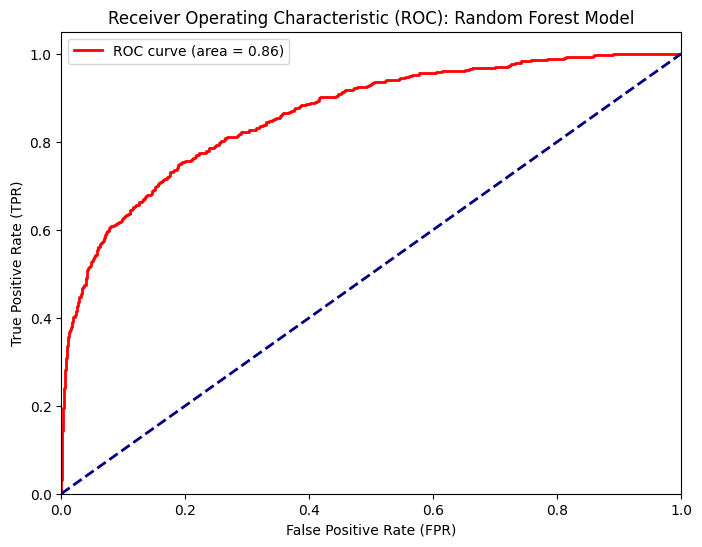

In [ ]:
# Convert 'No' and 'Yes' labels in test_y to 0 and 1, respectively

test_y_numeric = test_y.map({'Yes': 1, 'No': 0})

# Calculate the false positive rate (FPR), true positive rate (TPR), and thresholds for the ROC curve

fpr, tpr, _ = roc_curve(test_y_numeric, pred_y_proba_random_forest)

# Calculate the area under the ROC curve (AUC) for the ROC curve

roc_auc = auc(fpr, tpr)

# Plot ROC curve for the random forest model

plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, color = 'red', lw = 2, label = 'ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color = 'navy', lw = 2, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC): Random Forest Model')
plt.legend(loc = "upper left")
plt.show()

In [ ]:
# Get feature names from the training data

feature_names_random_forest = train_X.columns

# Get the feature importances from the trained model

importances = best_random_forest.feature_importances_

# Create a DataFrame to show feature importance

feature_importance_random_forest = pd.DataFrame({'Feature': feature_names_random_forest, 'Importance (Gini Impurity)': importances})

# Sort features by importance for the random forest model

feature_importance_random_forest = feature_importance_random_forest.sort_values(by = 'Importance (Gini Impurity)', ascending = False)
feature_importance_random_forest

,Feature,Importance (Gini Impurity)
0,Age,0.190698
4,NumOfProducts,0.164777
1,Balance,0.117053
2,EstimatedSalary,0.100888
3,CreditScore,0.094838
9,CategorizedAge_Late Career Adults,0.060458
19,IsActiveMember_Yes,0.059714
5,Tenure,0.054995
7,Geography_Germany,0.035899
11,CategorizedAge_Near-Retirement Adults,0.026268


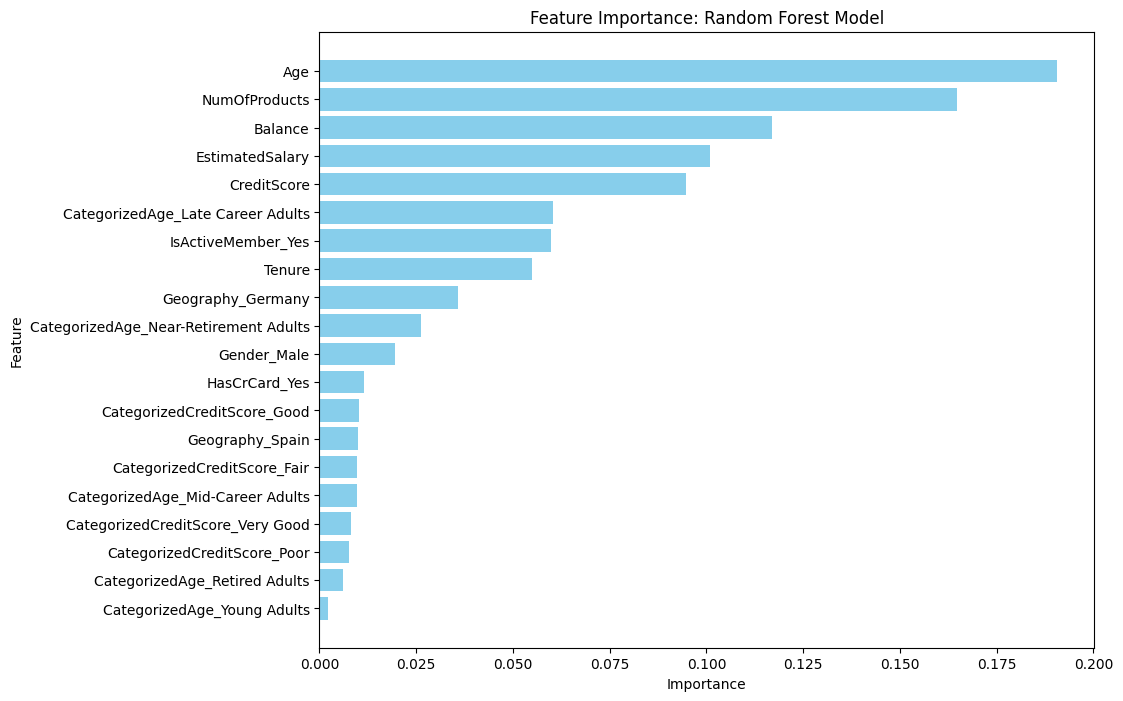

In [ ]:
# Plot feature importance of the random forest model

plt.figure(figsize = (10, 8))
plt.barh(feature_importance_random_forest['Feature'], feature_importance_random_forest['Importance (Gini Impurity)'], color = 'skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance: Random Forest Model')
plt.gca().invert_yaxis()  # To display the most important feature at the top
plt.show()